# Data Modelling (Variant IV)

---

The modelling for this variant follows the same process as the Base dataset.

In [7]:
%run ../functions.py

In [8]:
X_train_v4_scaled = pd.read_csv('../Data/var4/X_train_v4_scaled.csv')
y_train_v4 = pd.read_csv('../Data/var4/y_train_v4.csv')
X_val_v4_scaled = pd.read_csv('../Data/var4/X_val_v4_scaled.csv')
y_val_v4 = pd.read_csv('../Data/var4/y_val_v4.csv')
X_test_v4_scaled = pd.read_csv('../Data/var4/X_test_v4_scaled.csv')
y_test_v4 = pd.read_csv('../Data/var4/y_test_v4.csv')

---

### Baseline Model

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

v4_baseline_model = DummyClassifier(random_state=21)

v4_baseline_model.fit(X_train_v4_scaled, y_train_v4)

v4_baseline_results = cross_val_score(v4_baseline_model,
                                      X_train_v4_scaled,
                                      y_train_v4,
                                      scoring='recall',
                                      cv=10).mean()

print(f"Train recall: {v4_baseline_results}")

Train recall: 0.011219037191013479


---

### First Model Iteration

In [9]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

n_features = X_train_v4_scaled.shape[1]

In [5]:
def modelling_v1(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v1 = models.Sequential()

    model_v1.add(layers.Input(shape=(n_features, )))
    model_v1.add(layers.Dense(32, activation='relu'))
    model_v1.add(layers.Dense(16, activation='relu'))
    model_v1.add(layers.Dense(1, activation='sigmoid'))

    model_v1.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v1_history = model_v1.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v1,
             name,
             model_v1_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00013: early stopping
Results for Variant III Model V1 with threshold = 0.5.

 Train f1: 0.05665529095894129 
 Val f1: 0.02686915966821521 

 Train Recall: 0.029720697551965714 
 Val Recall: 0.01378896925598383 

 Train FPR: 0.00021734782785642892 
 Val FPR: 0.00015622210048604757


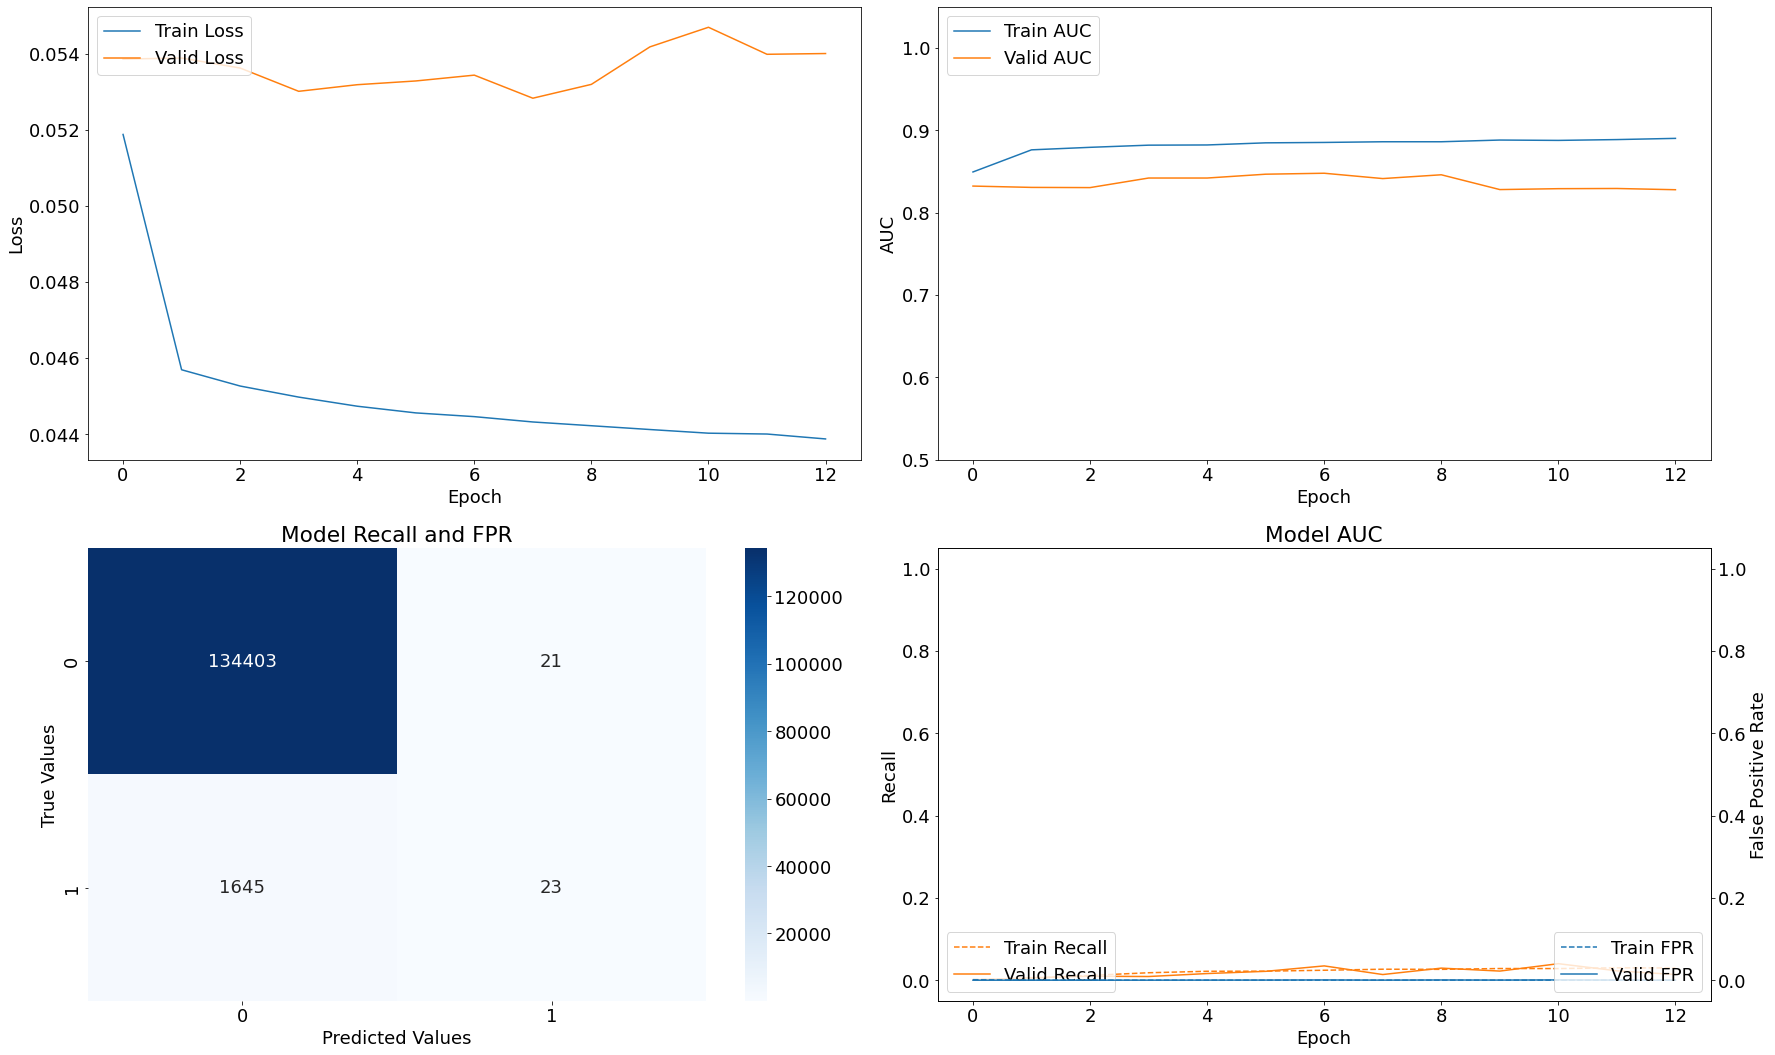

In [6]:
modelling_v1(X_train_v4_scaled,
             y_train_v4,
             X_val_v4_scaled,
             y_val_v4,
             'Variant IV Model V1')

---

### Second Model Iteration

In [7]:
def modelling_v2(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v2 = models.Sequential()

    model_v2.add(layers.Input(shape=(n_features, )))
    model_v2.add(layers.Dense(32, activation='relu'))
    model_v2.add(layers.Dropout(0.5))
    model_v2.add(layers.Dense(16, activation='relu'))
    model_v2.add(layers.Dropout(0.5))
    model_v2.add(layers.Dense(1, activation='sigmoid'))

    model_v2.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['AUC',
                                   tf.keras.metrics.Precision(thresholds=threshold),
                                   tf.keras.metrics.Recall(thresholds=threshold),
                                   FalsePositiveRate(threshold=threshold)])

    model_v2_history = model_v2.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v2,
             name,
             model_v2_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00013: early stopping
Results for Variant III Model V2 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.011458582244813442 
 Val Recall: 0.0 

 Train FPR: 0.00019601306121330708 
 Val FPR: 0.0


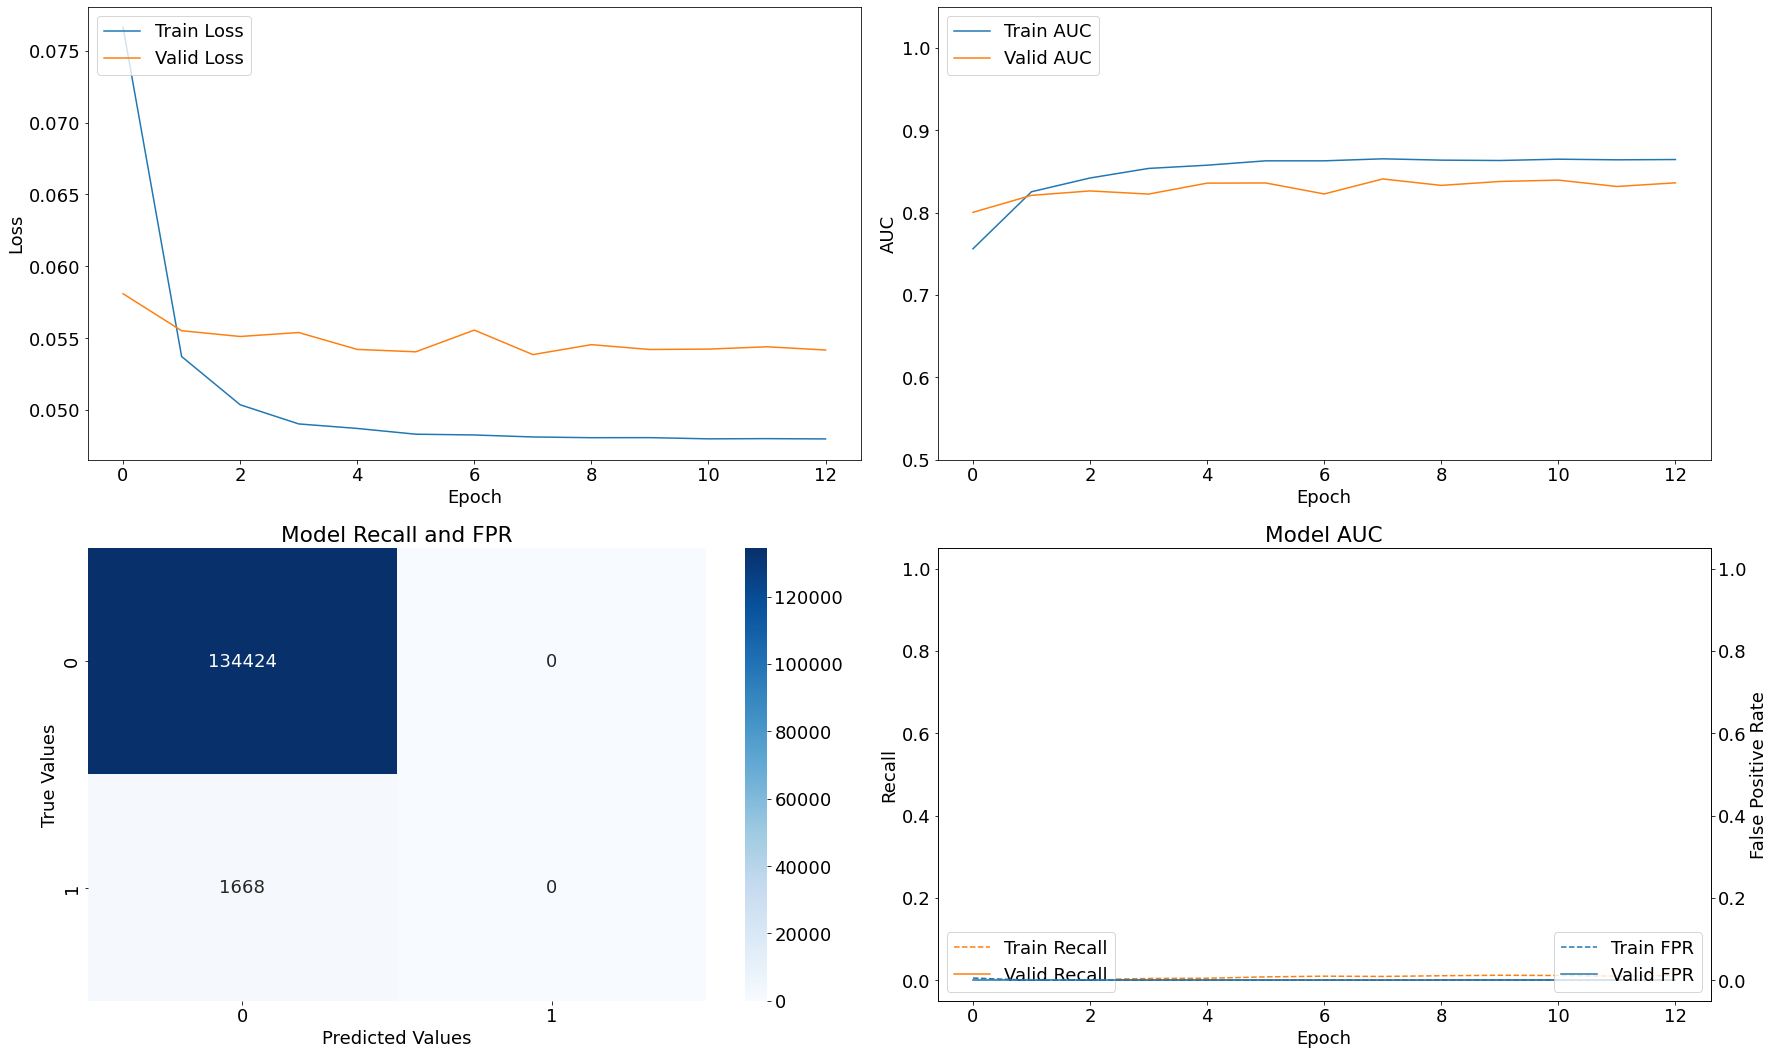

In [8]:
modelling_v2(X_train_v4_scaled,
             y_train_v4,
             X_val_v4_scaled,
             y_val_v4,
             'Variant IV Model V2')

---

### Third Model Iteration

In [10]:
class_weight = create_class_weight({0: len(y_train_v4 == 0), 1: len(y_train_v4 == 1)})

In [28]:
def modelling_v3(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v3 = models.Sequential()

    model_v3.add(layers.Input(shape=(n_features, )))
    model_v3.add(layers.Dense(32, activation='relu'))
    model_v3.add(layers.Dropout(0.5))
    model_v3.add(layers.Dense(16, activation='relu'))
    model_v3.add(layers.Dropout(0.5))
    model_v3.add(layers.Dense(1, activation='sigmoid'))

    model_v3.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v3_history = model_v3.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v3,
             name,
             model_v3_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00019: early stopping
Results for Variant IV Model v4 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.015994271263480186 
 Val Recall: 0.0 

 Train FPR: 0.00024268284323625267 
 Val FPR: 0.0


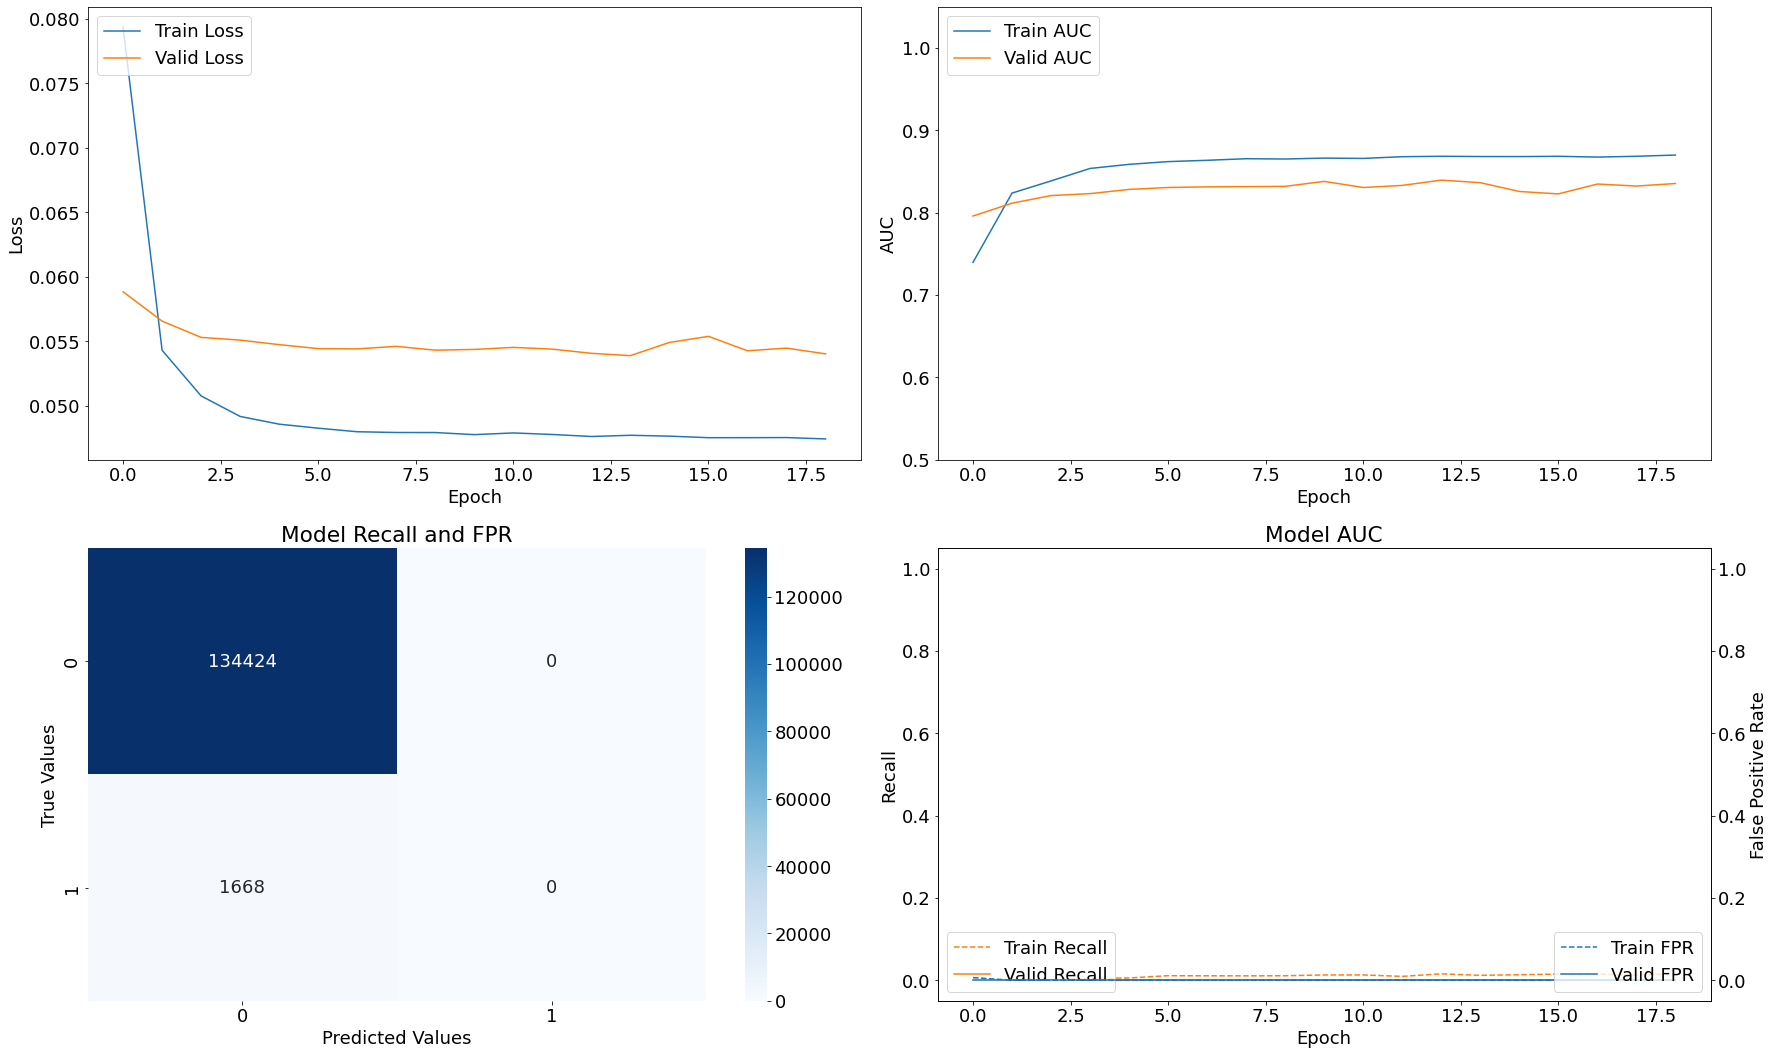

In [29]:
modelling_v3(X_train_v4_scaled,
             y_train_v4,
             X_val_v4_scaled,
             y_val_v4,
             'Variant IV Model v4')

---

### Fourth Model Iteration

In [11]:
X_train_v4_scaled_resampled = pd.read_csv('../Data/var4/X_train_v4_scaled_resampled.csv')
y_train_v4_resampled = pd.read_csv('../Data/var4/y_train_v4_resampled.csv')

In [14]:
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]

In [14]:
def modelling_v4(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):    
    
    model_v4 = models.Sequential()

    model_v4.add(layers.Input(shape=(n_features, )))
    model_v4.add(layers.Dense(32, activation='relu'))
    model_v4.add(layers.Dropout(0.5))
    model_v4.add(layers.Dense(16, activation='relu'))
    model_v4.add(layers.Dropout(0.5))
    model_v4.add(layers.Dense(1, activation='sigmoid'))

    model_v4.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v4_history = model_v4.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history

    evaluate(model_v4,
             'Base Model V4',
             model_v4_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00017: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.6976630234659427 
 Val f1: 0.1731301924698648 

 Train Recall: 0.6376281976699829 
 Val Recall: 0.37470024824142456 

 Train FPR: 0.04756717011332512 
 Val FPR: 0.03665268048644066


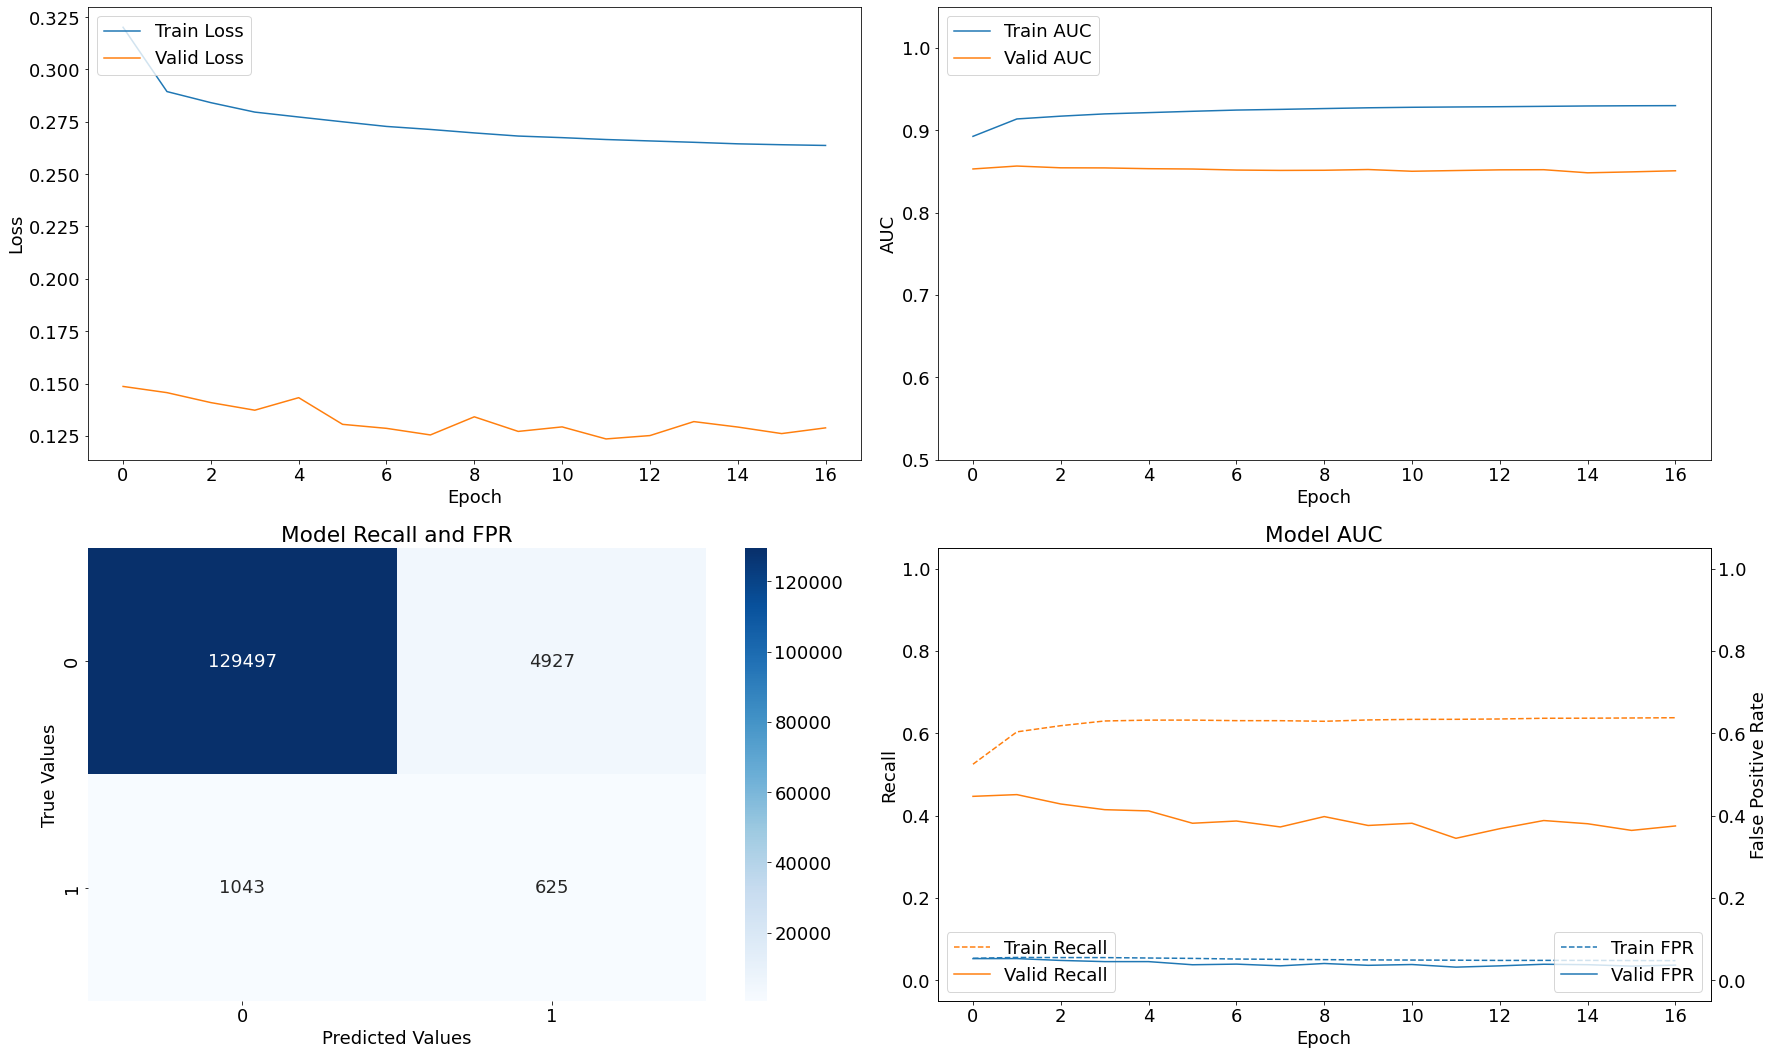

Epoch 00016: early stopping
Results for Base Model V4 with threshold = 0.4.

 Train f1: 0.7320182442755657 
 Val f1: 0.15862876616378002 

 Train Recall: 0.7399499416351318 
 Val Recall: 0.4466426968574524 

 Train FPR: 0.07043002545833588 
 Val FPR: 0.05192525312304497


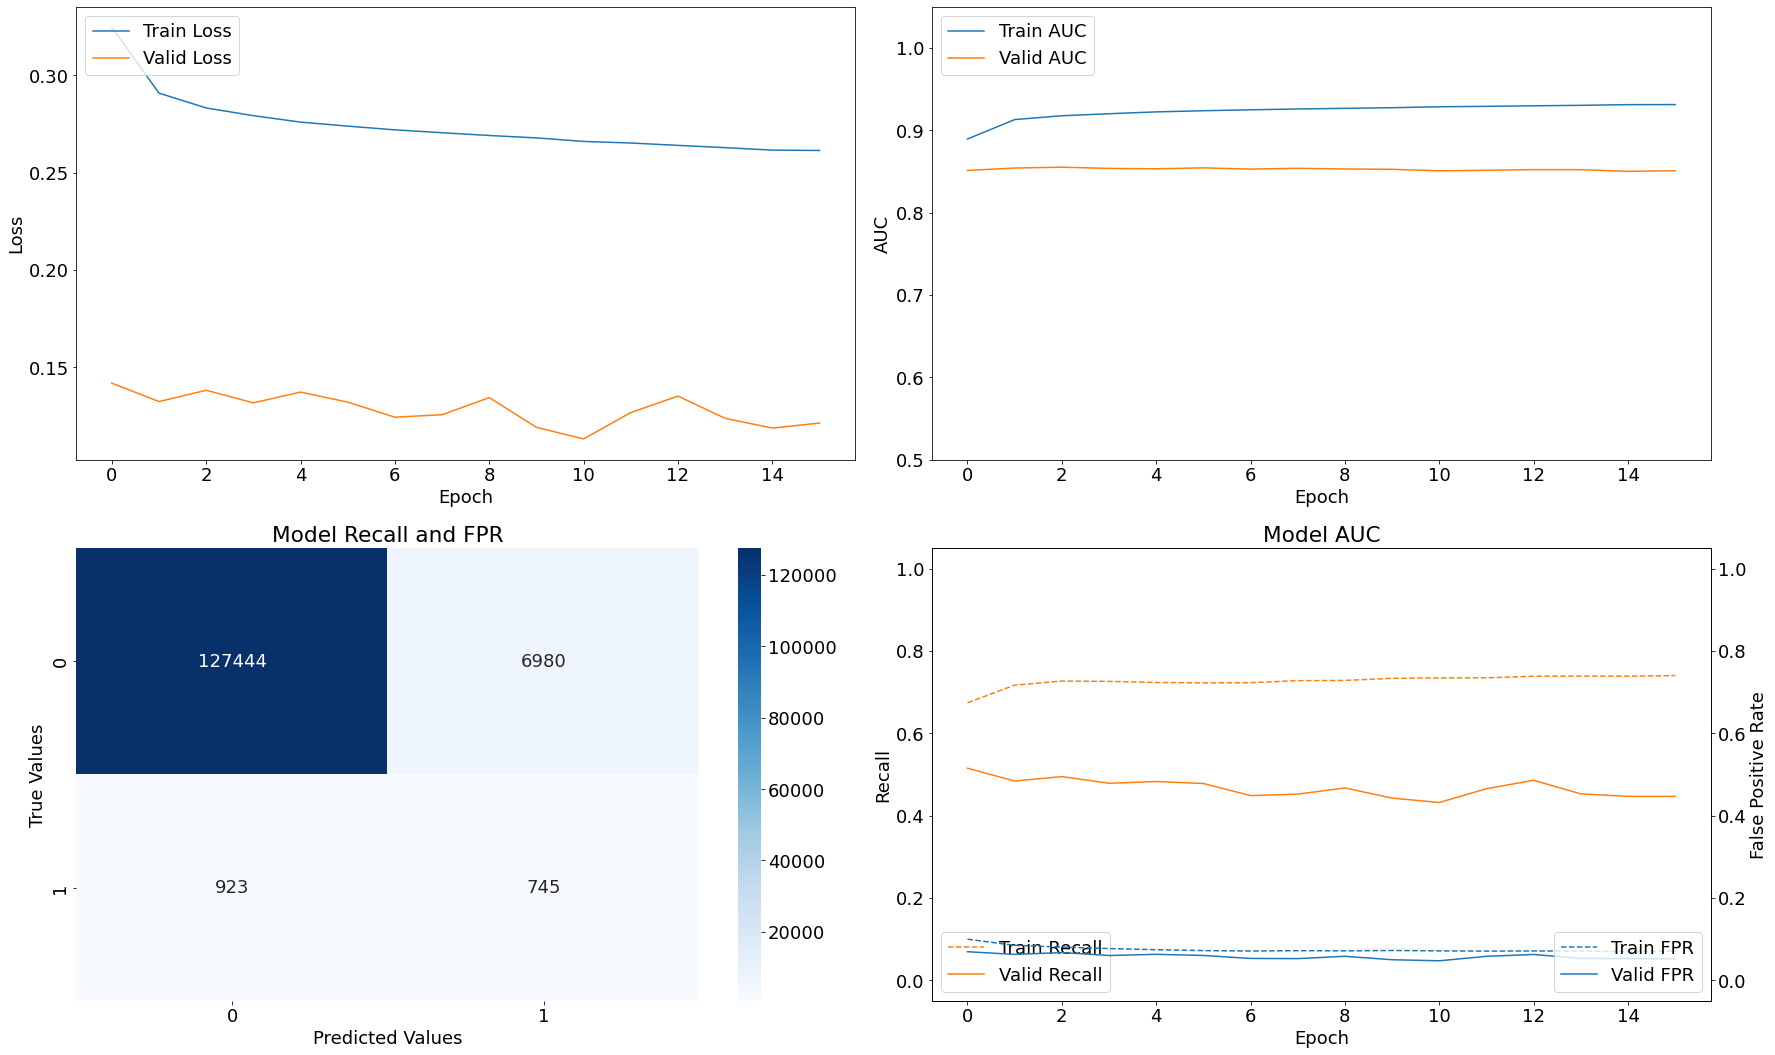

Epoch 00010: early stopping
Results for Base Model V4 with threshold = 0.3.

 Train f1: 0.7230342714585201 
 Val f1: 0.13161346641794724 

 Train Recall: 0.8143337965011597 
 Val Recall: 0.5413669347763062 

 Train FPR: 0.10955263674259186 
 Val FPR: 0.08295393735170364


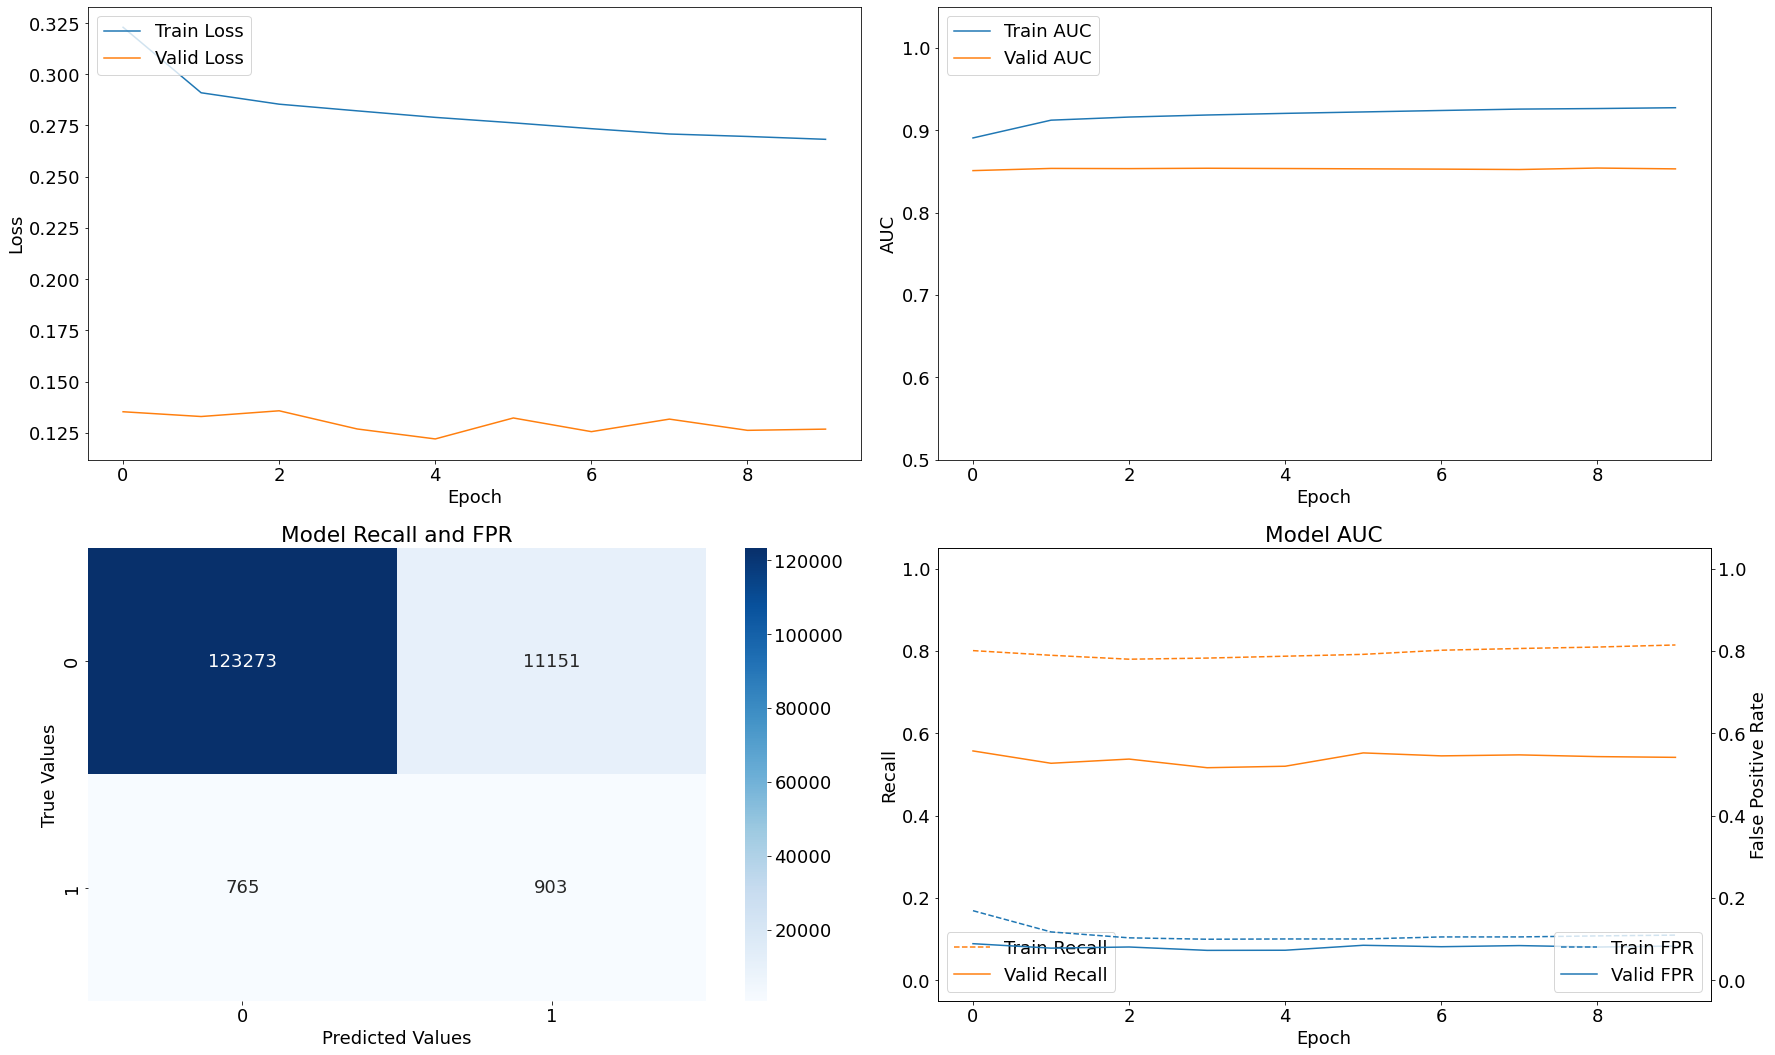

Epoch 00014: early stopping
Results for Base Model V4 with threshold = 0.2.

 Train f1: 0.6872065515091444 
 Val f1: 0.10780706182388303 

 Train Recall: 0.8965368270874023 
 Val Recall: 0.6498801112174988 

 Train FPR: 0.17817054688930511 
 Val FPR: 0.12912872433662415


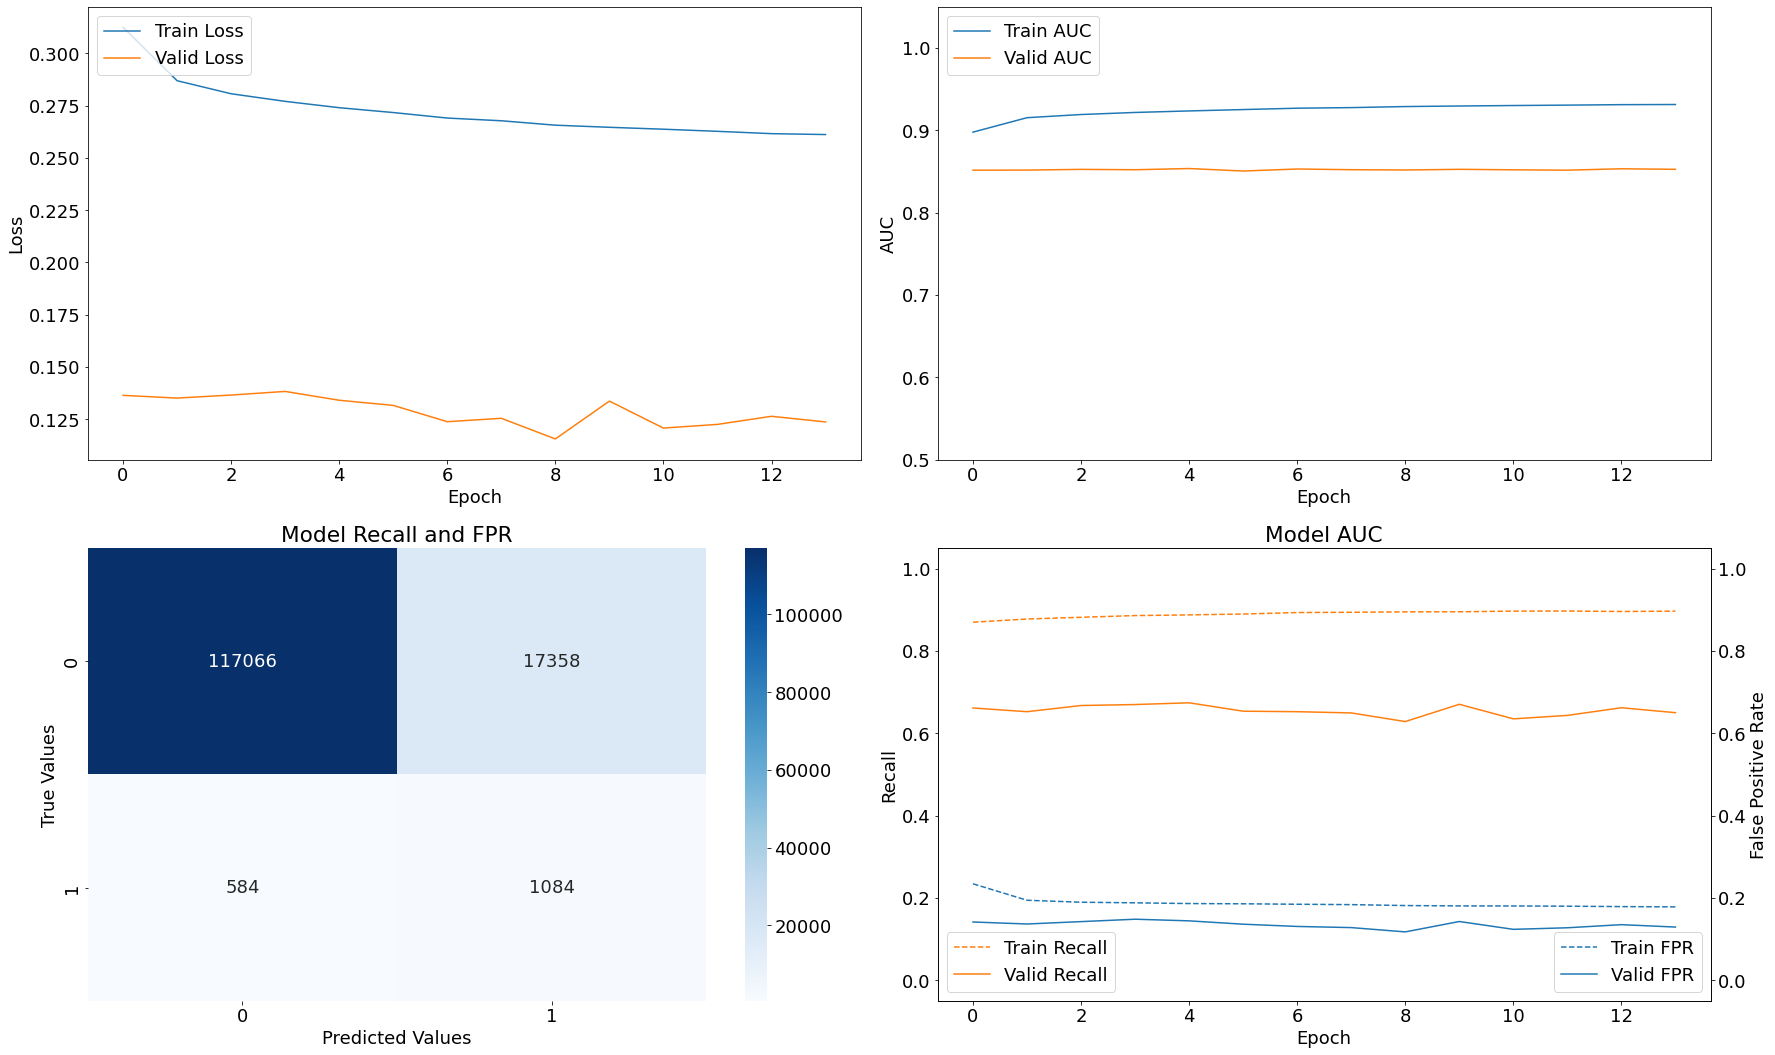

Epoch 00011: early stopping
Results for Base Model V4 with threshold = 0.1.

 Train f1: 0.6117964418022773 
 Val f1: 0.08122784724094123 

 Train Recall: 0.9459322690963745 
 Val Recall: 0.7488009333610535 

 Train FPR: 0.2865937650203705 
 Val FPR: 0.20707611739635468


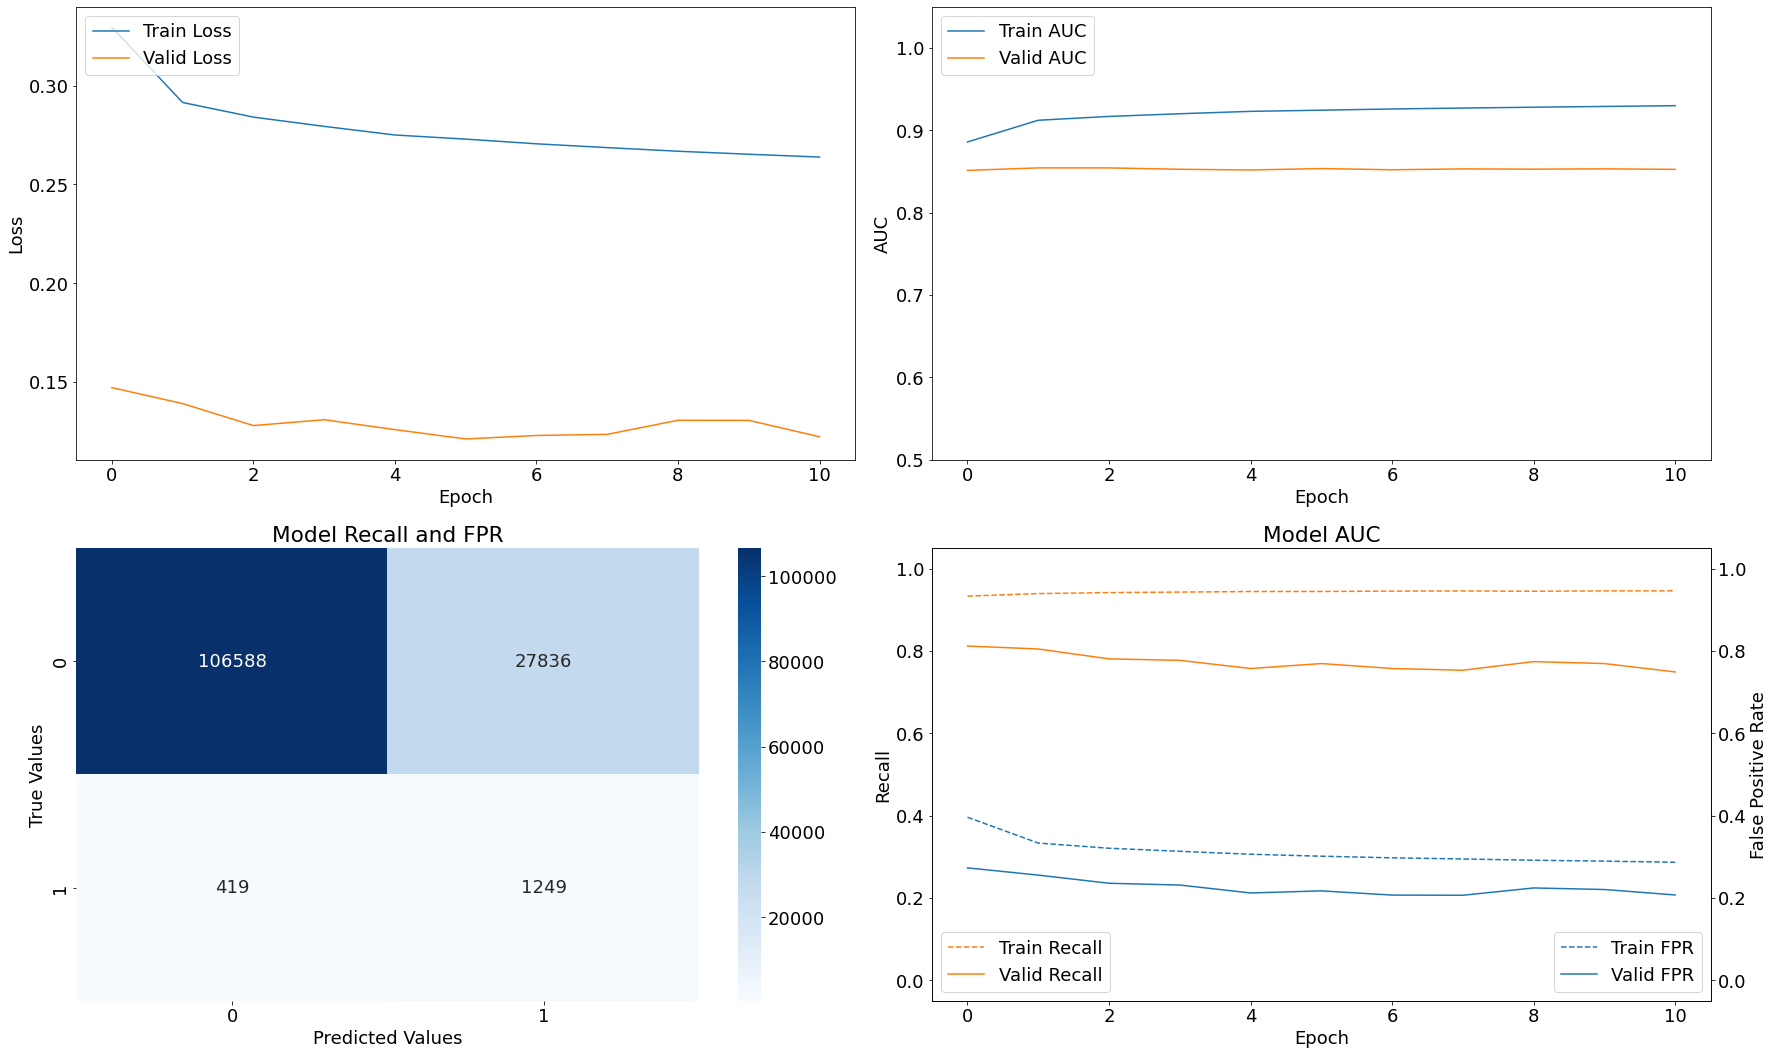

In [15]:
for t in thresholds:
    
    modelling_v4(X_train_v4_scaled_resampled,
                 y_train_v4_resampled,
                 X_val_v4_scaled,
                 y_val_v4,
                 'Variant IV Model V4',
                 threshold=t)

---

### Fifth Model Iteration

In [30]:
def modelling_v5(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):

    model_v5 = models.Sequential()

    model_v5.add(layers.Input(shape=(n_features, )))
    model_v5.add(layers.Dense(32, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(16, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(8, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(4, activation='relu'))
    model_v5.add(layers.Dense(2, activation='relu'))
    model_v5.add(layers.Dense(1, activation='sigmoid'))

    model_v5.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v5_history = model_v5.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v5,
             name,
             model_v5_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00027: early stopping
Results for Variant IV Model V5 with threshold = 0.5.

 Train f1: 0.7082544311031123 
 Val f1: 0.17842876362906954 

 Train Recall: 0.6755081415176392 
 Val Recall: 0.3615107834339142 

 Train FPR: 0.0580051988363266 
 Val FPR: 0.033386893570423126


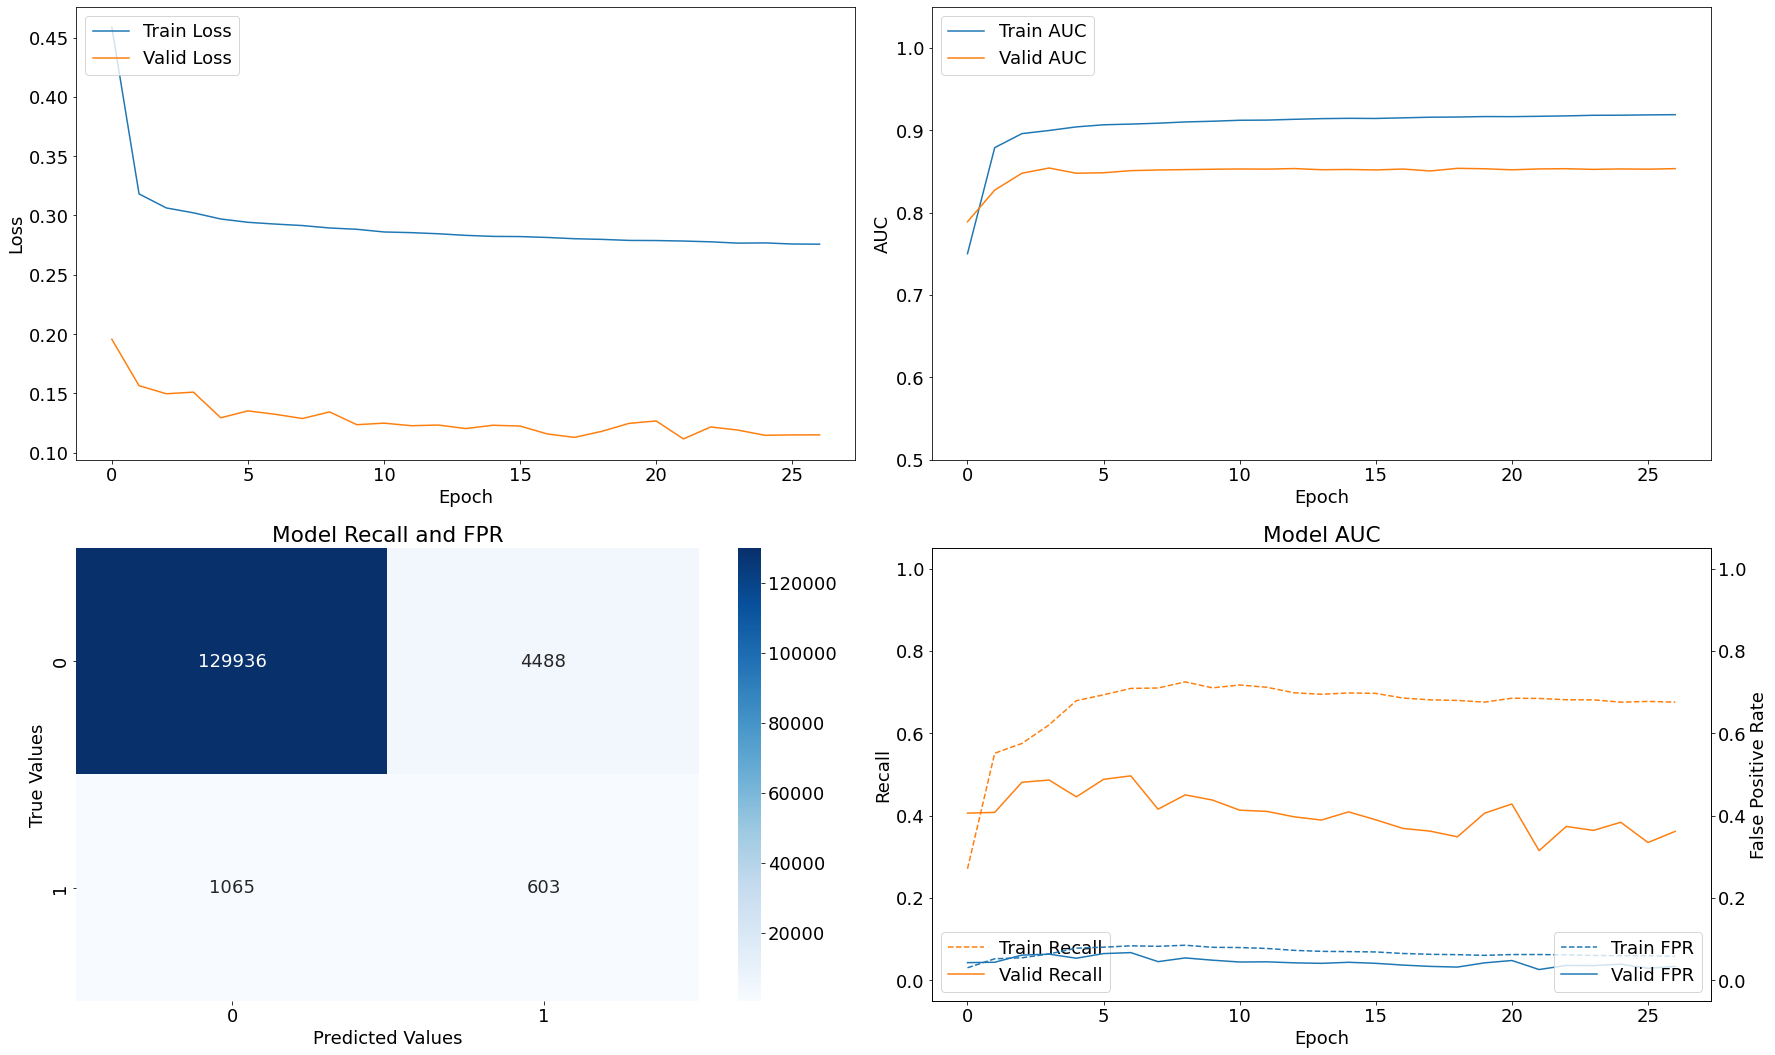

Epoch 00006: early stopping
Results for Variant IV Model V5 with threshold = 0.4.

 Train f1: 0.708321670819822 
 Val f1: 0.1419671812105705 

 Train Recall: 0.762276828289032 
 Val Recall: 0.4850119948387146 

 Train FPR: 0.09751717001199722 
 Val FPR: 0.06635719537734985


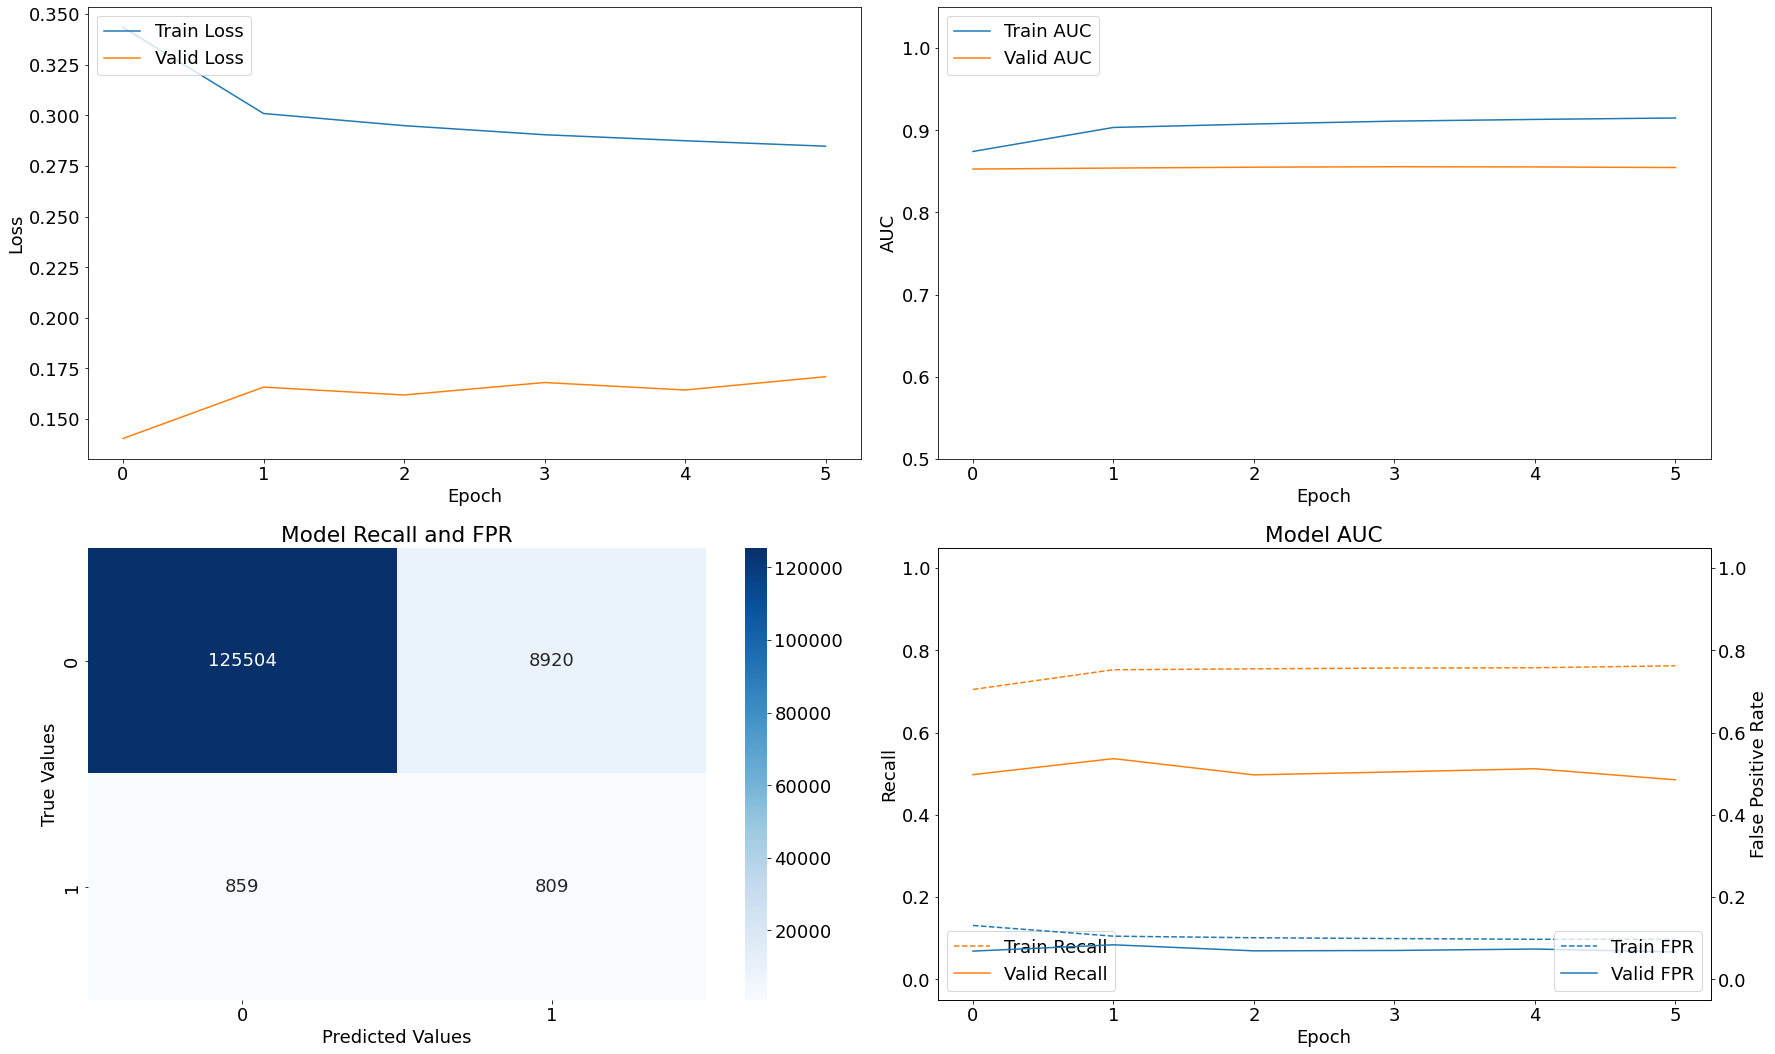

Epoch 00009: early stopping
Results for Variant IV Model V5 with threshold = 0.3.

 Train f1: 0.7317345301548736 
 Val f1: 0.14825253902486776 

 Train Recall: 0.7734189629554749 
 Val Recall: 0.47302159667015076 

 Train FPR: 0.08512834459543228 
 Val FPR: 0.06090430170297623


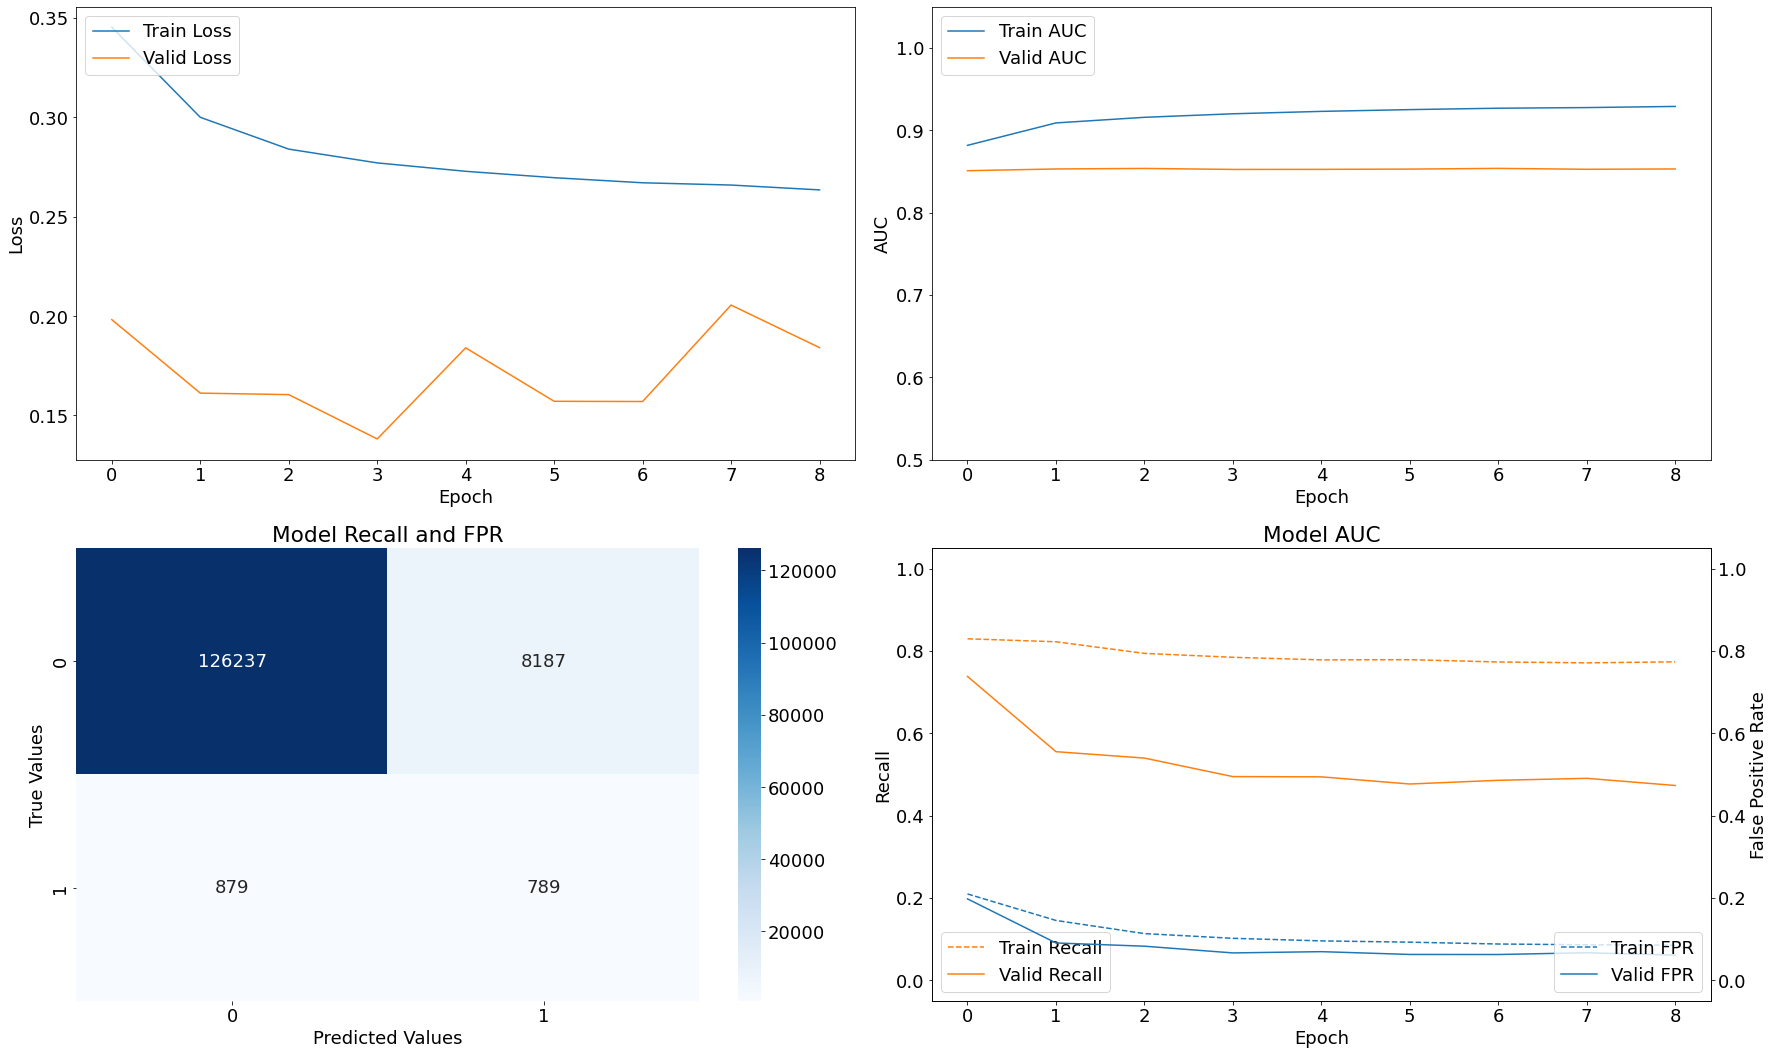

Epoch 00009: early stopping
Results for Variant IV Model V5 with threshold = 0.2.

 Train f1: 0.6827122183781882 
 Val f1: 0.10136615898925705 

 Train Recall: 0.8445972204208374 
 Val Recall: 0.6516786813735962 

 Train FPR: 0.15741048753261566 
 Val FPR: 0.13905255496501923


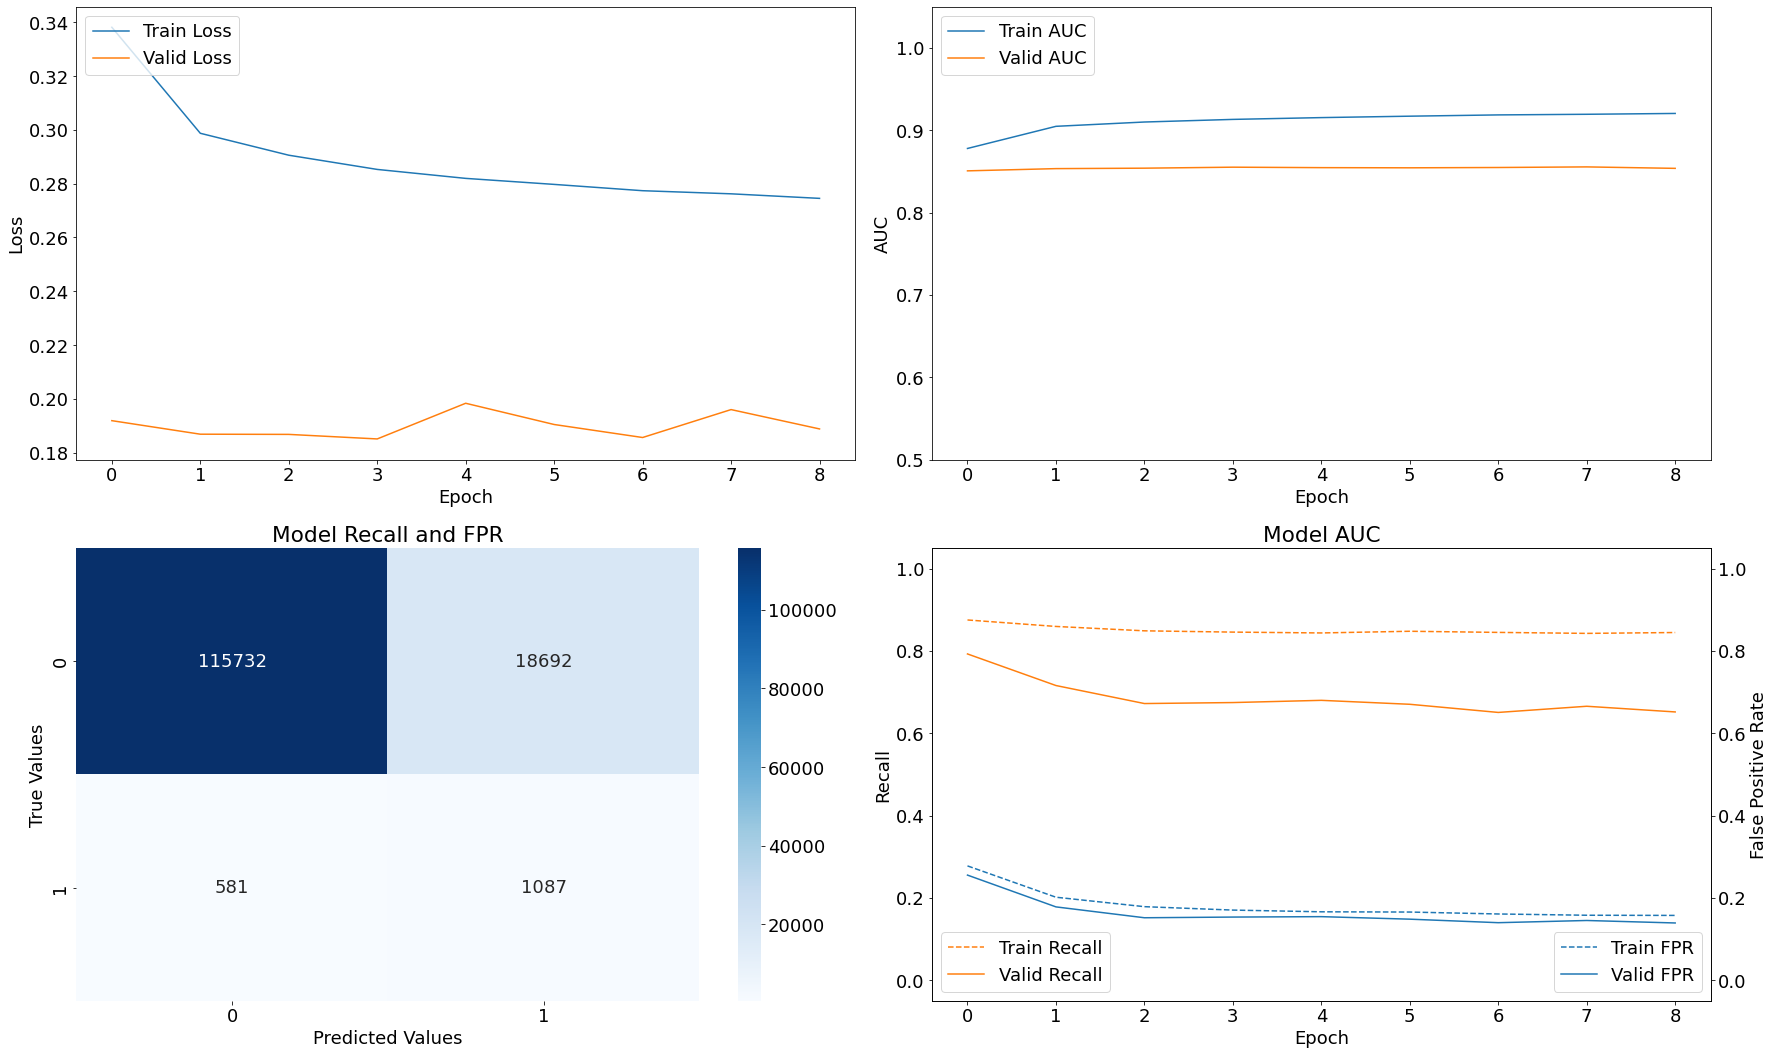

Epoch 00014: early stopping
Results for Variant IV Model V5 with threshold = 0.1.

 Train f1: 0.6485198770556049 
 Val f1: 0.08982035933724065 

 Train Recall: 0.8907977342605591 
 Val Recall: 0.7104316353797913 

 Train FPR: 0.2140929400920868 
 Val FPR: 0.17506545782089233


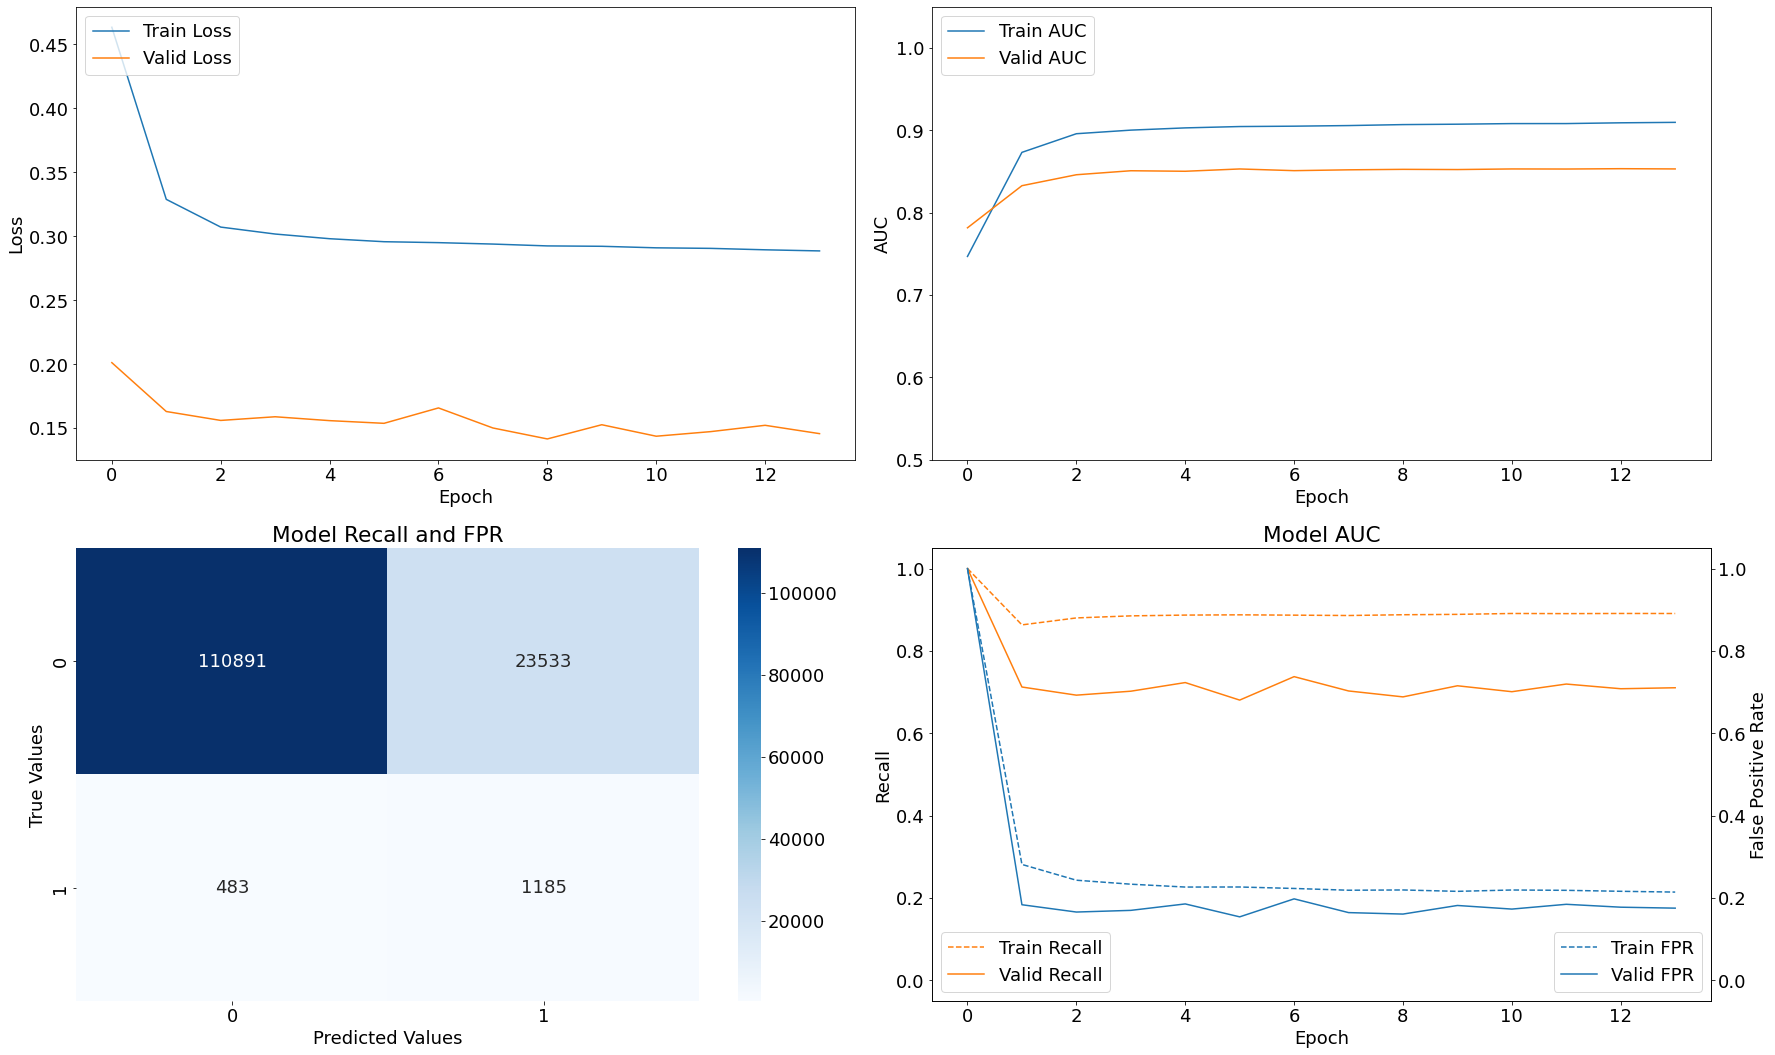

In [31]:
for t in thresholds:
    
    modelling_v5(X_train_v4_scaled_resampled,
                 y_train_v4_resampled,
                 X_val_v4_scaled,
                 y_val_v4,
                 'Variant IV Model V5',
                 threshold=t)

---

### Sixth Model Iteration

In [18]:
def modelling_v6(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):     
    
    model_v6 = models.Sequential()

    model_v6.add(layers.Input(shape=(n_features, )))
    model_v6.add(layers.Dense(32, kernel_initializer='lecun_normal', activation='selu'))
    model_v6.add(layers.AlphaDropout(0.25))
    model_v6.add(layers.Dense(16, kernel_initializer='lecun_normal', activation='selu'))
    model_v6.add(layers.AlphaDropout(0.25))
    model_v6.add(layers.Dense(1, activation='sigmoid'))

    model_v6.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v6_history = model_v6.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v6,
             name,
             model_v6_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00023: early stopping
Results for Variant III Model V6 with threshold = 0.5.

 Train f1: 0.7371051224839636 
 Val f1: 0.17346655604323116 

 Train Recall: 0.6930880546569824 
 Val Recall: 0.37470024824142456 

 Train FPR: 0.04686979204416275 
 Val FPR: 0.03654853254556656


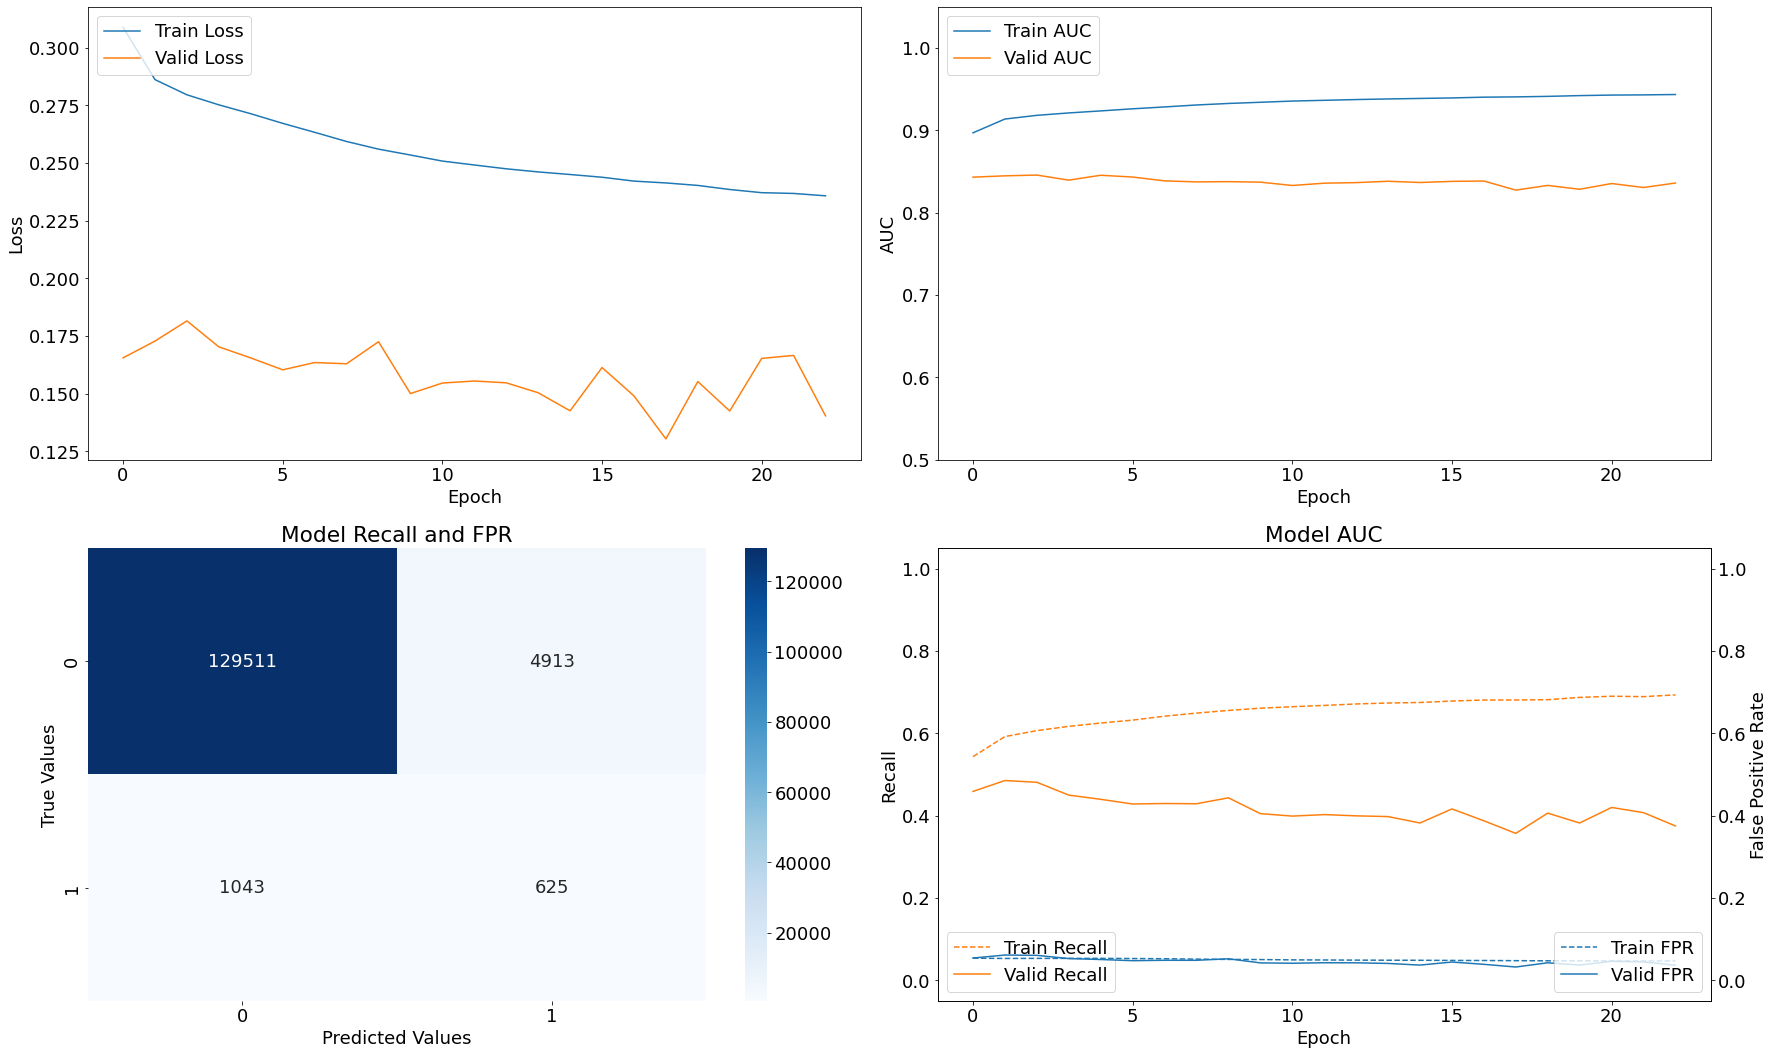

Epoch 00006: early stopping
Results for Variant III Model V6 with threshold = 0.4.

 Train f1: 0.7186326916312868 
 Val f1: 0.13419393909047975 

 Train Recall: 0.7437635660171509 
 Val Recall: 0.5359712243080139 

 Train FPR: 0.08154410123825073 
 Val FPR: 0.08006010949611664


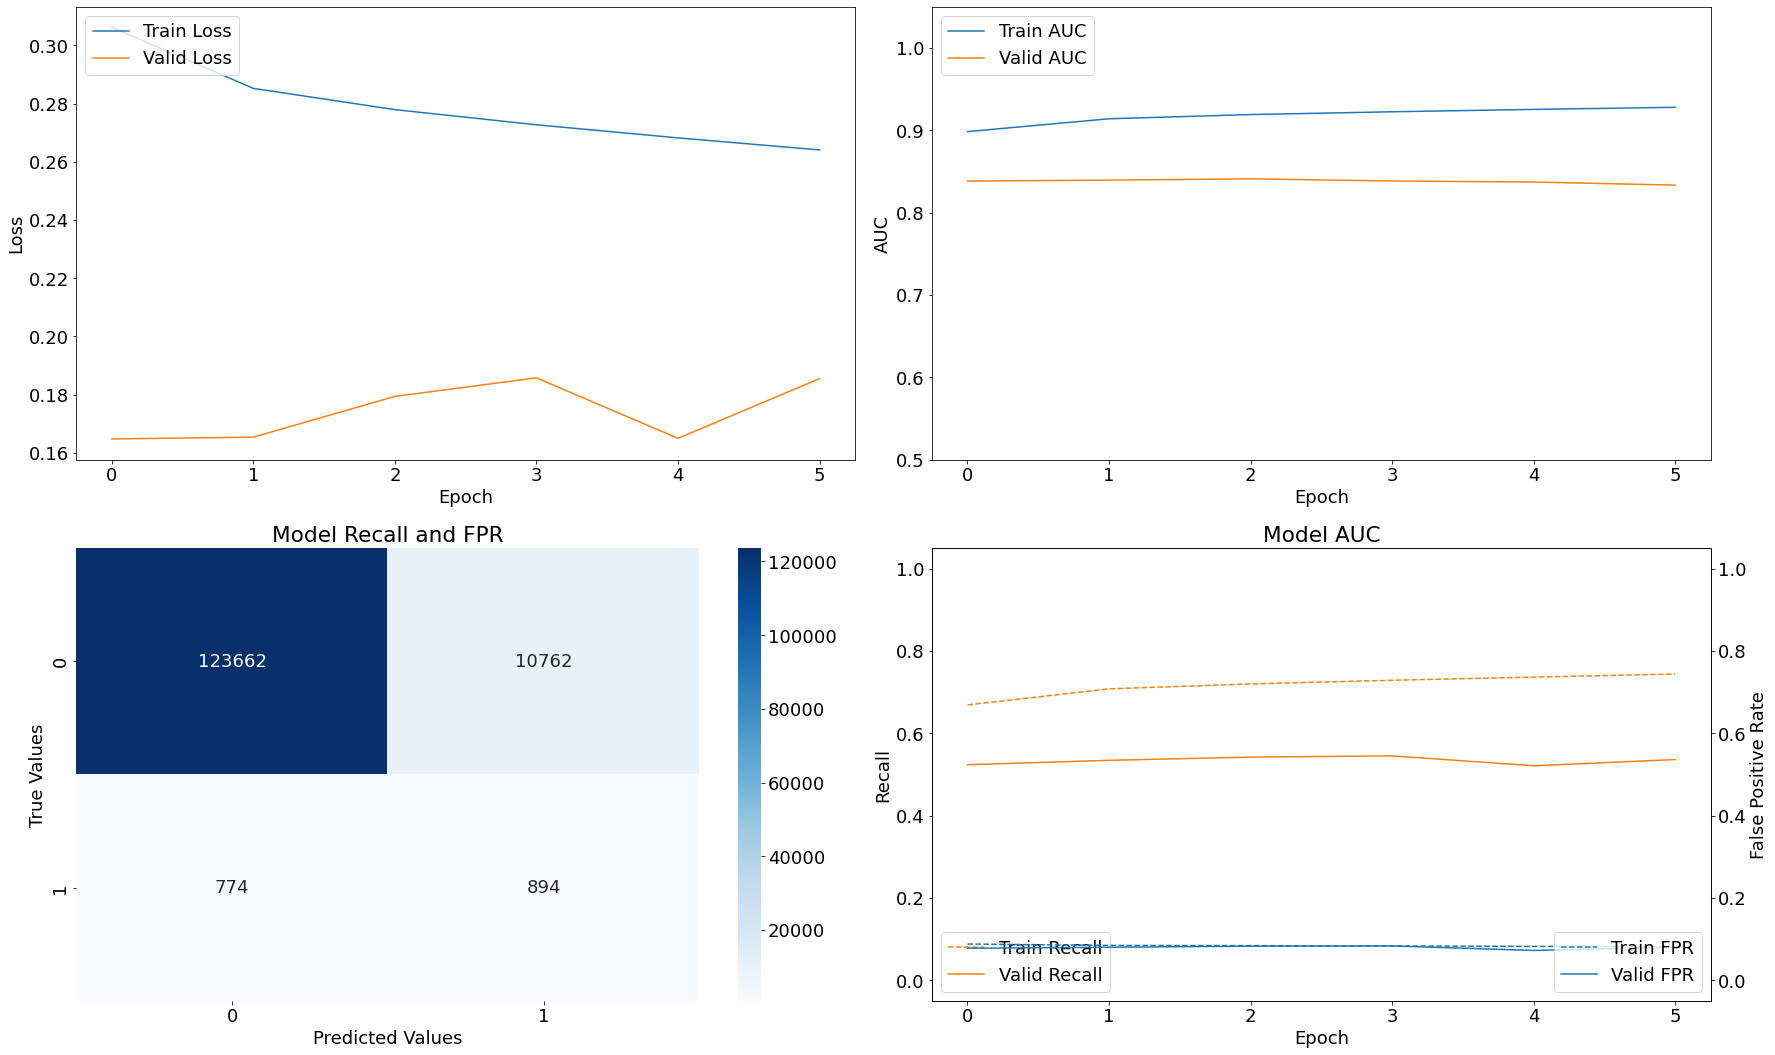

Epoch 00006: early stopping
Results for Variant III Model V6 with threshold = 0.3.

 Train f1: 0.7118565850846398 
 Val f1: 0.11021477392310845 

 Train Recall: 0.823950469493866 
 Val Recall: 0.6306954622268677 

 Train FPR: 0.12274551391601562 
 Val FPR: 0.12177884578704834


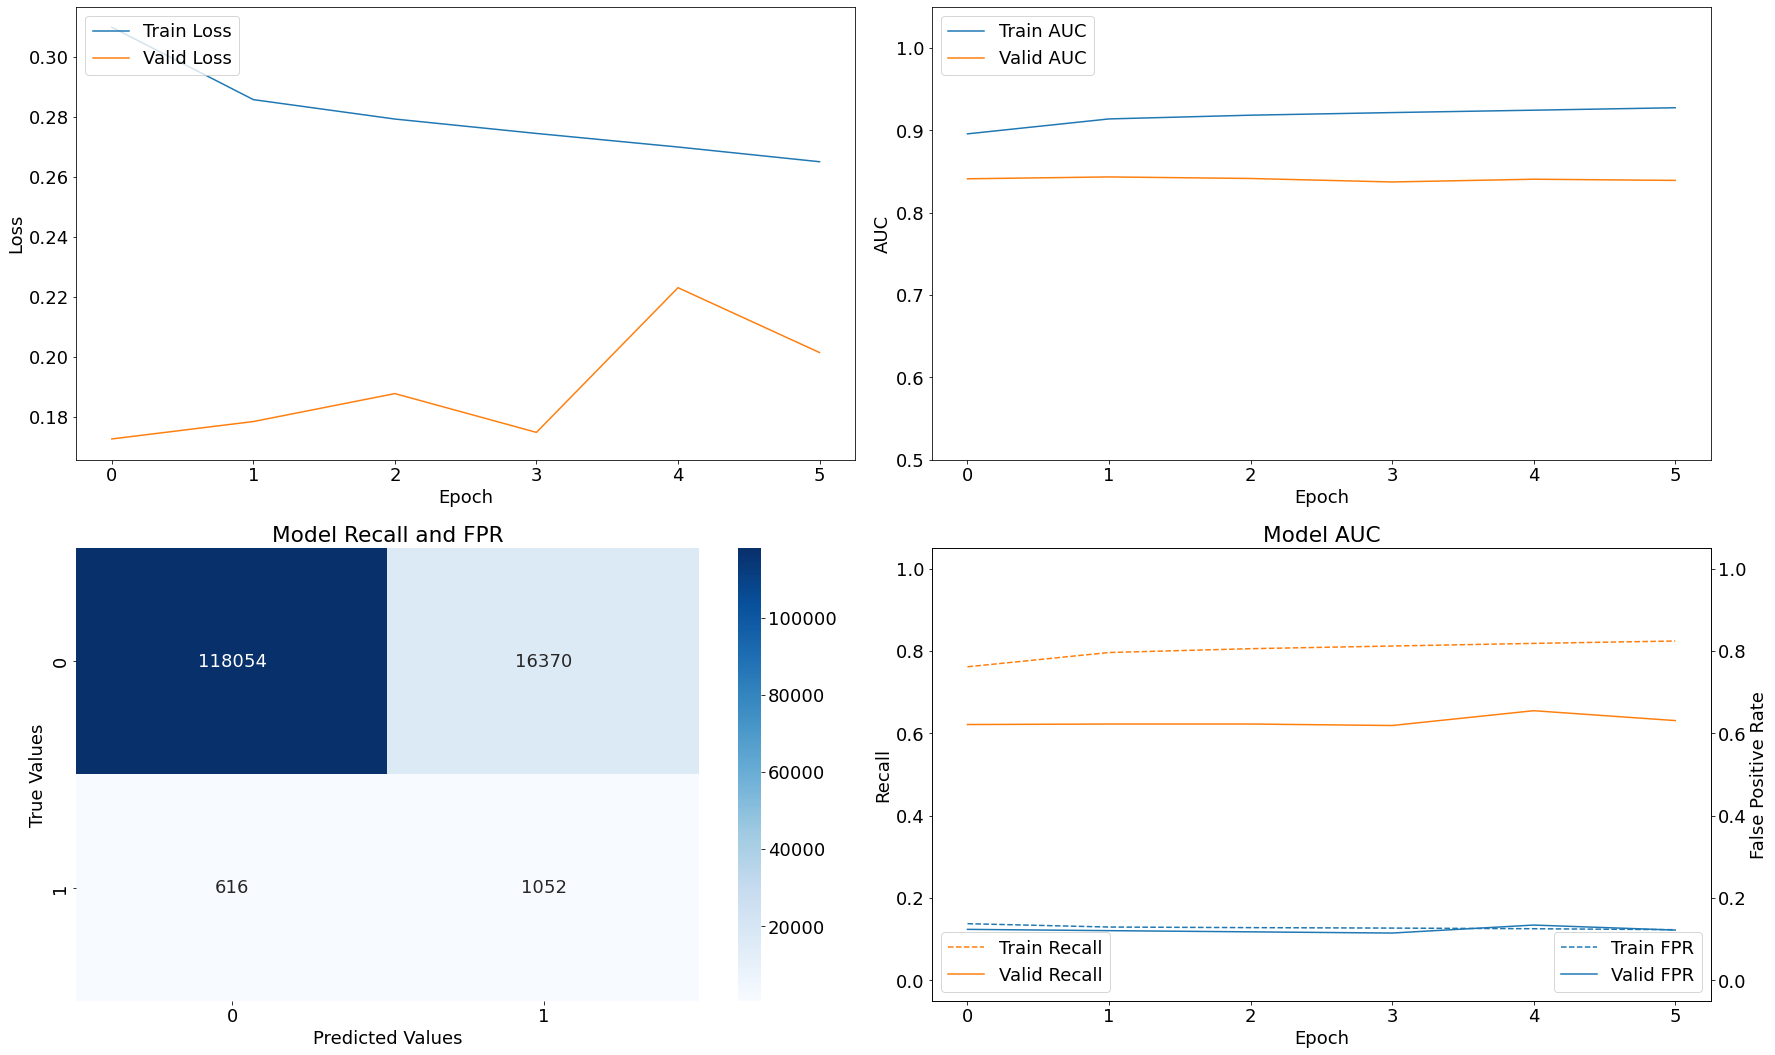

Epoch 00009: early stopping
Results for Variant III Model V6 with threshold = 0.2.

 Train f1: 0.6921968239551652 
 Val f1: 0.12358561220237502 

 Train Recall: 0.8848826885223389 
 Val Recall: 0.5893285274505615 

 Train FPR: 0.1679631918668747 
 Val FPR: 0.09862077981233597


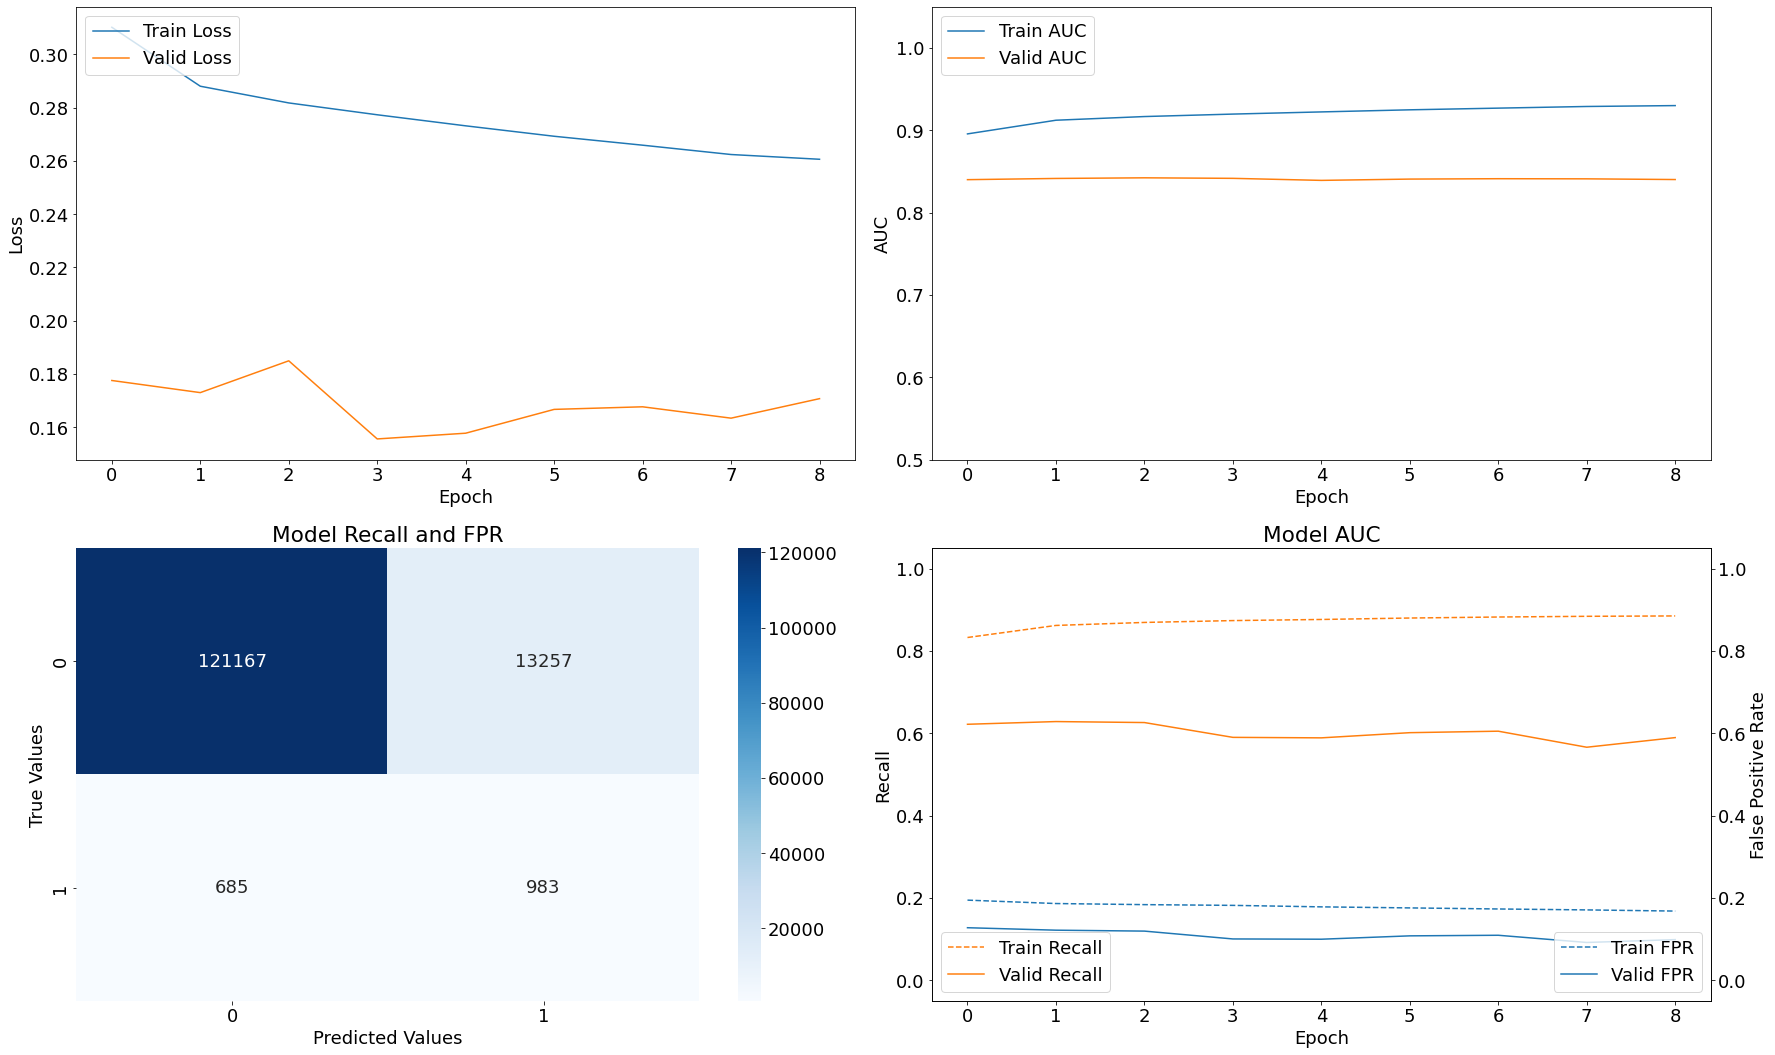

Epoch 00006: early stopping
Results for Variant III Model V6 with threshold = 0.1.

 Train f1: 0.6225081460687922 
 Val f1: 0.08755426775913559 

 Train Recall: 0.9354621767997742 
 Val Recall: 0.7254196405410767 

 Train FPR: 0.267499178647995 
 Val FPR: 0.18420818448066711


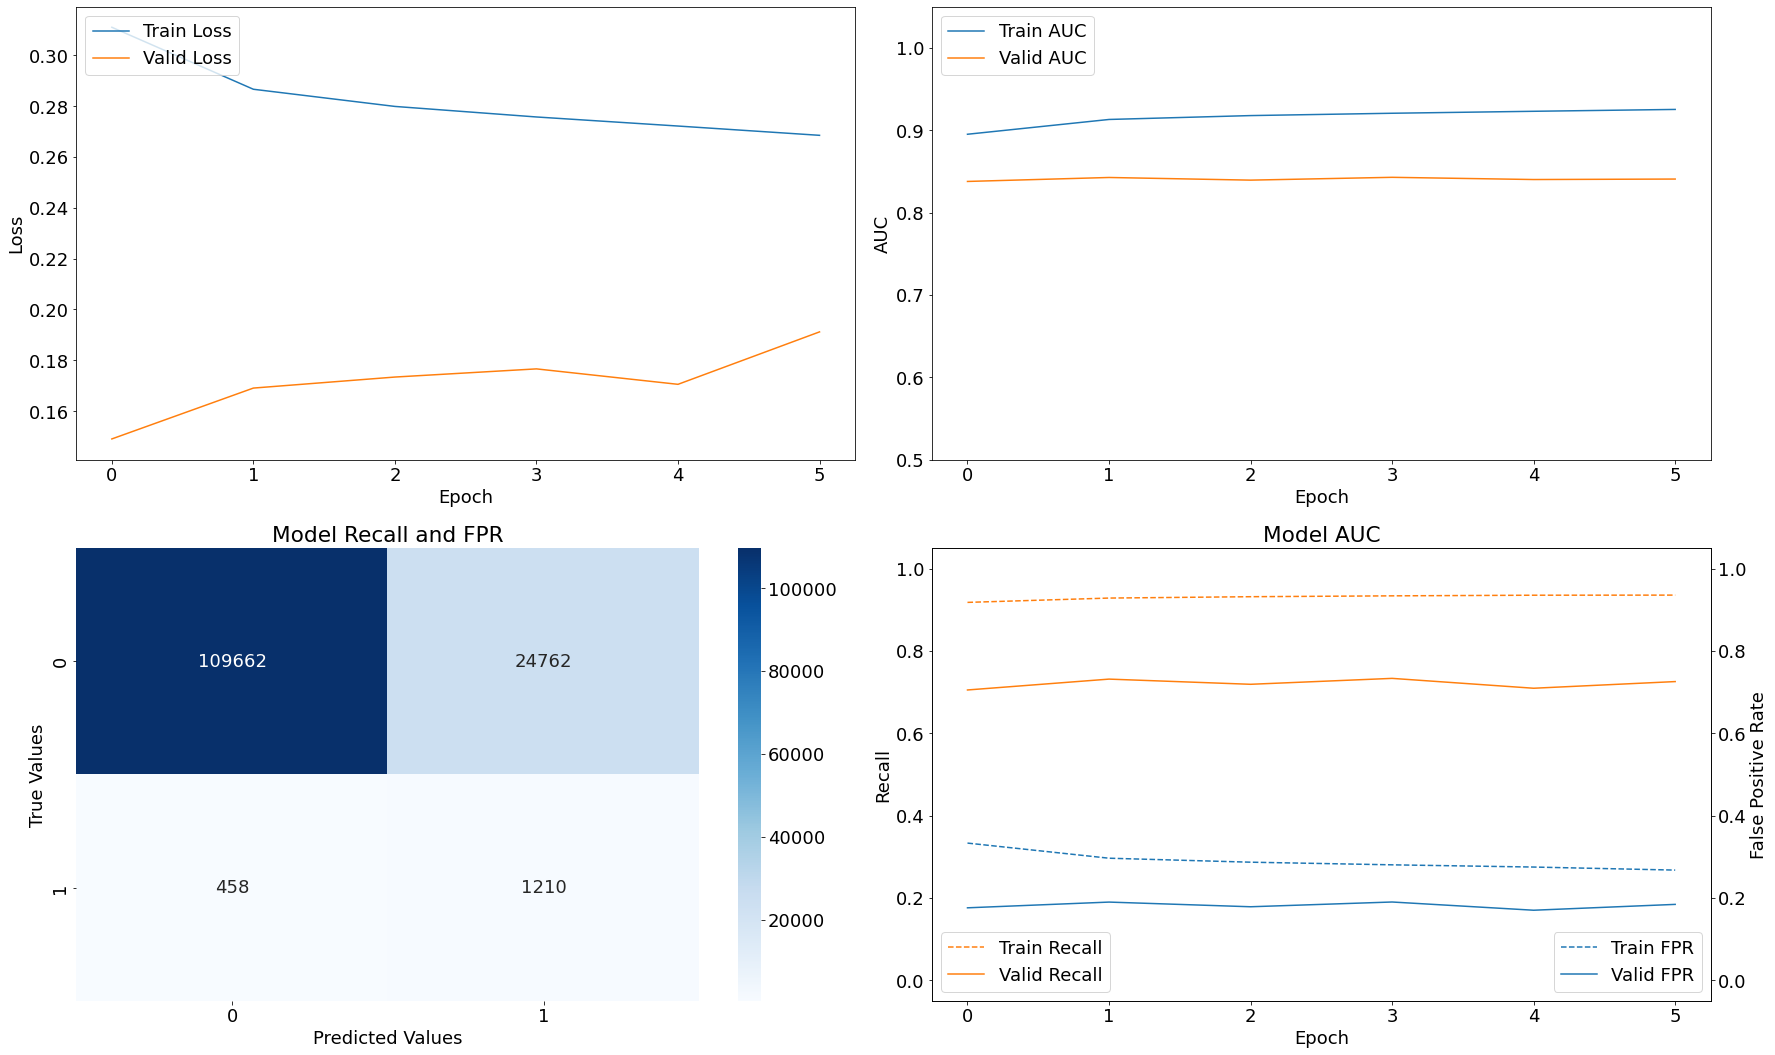

In [19]:
for t in thresholds:
    
    modelling_v6(X_train_v4_scaled_resampled,
                 y_train_v4_resampled,
                 X_val_v4_scaled,
                 y_val_v4,
                 'Variant IV Model V6',
                 threshold=t)

---

### Seventh Model Iteration

In [20]:
def modelling_v7(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5): 

    model_v7 = models.Sequential()

    model_v7.add(layers.Input(shape=(n_features, )))
    model_v7.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.AlphaDropout(0.25))
    model_v7.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.AlphaDropout(0.25))
    model_v7.add(layers.Dense(1, activation='sigmoid'))

    model_v7.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v7_history = model_v7.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v7,
             name,
             model_v7_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00006: early stopping
Results for Variant III Model V7 with threshold = 0.5.

 Train f1: 0.5433646598539418 
 Val f1: 0.13777441493160533 

 Train Recall: 0.4461536109447479 
 Val Recall: 0.4910072088241577 

 Train FPR: 0.049008600413799286 
 Val FPR: 0.06994286924600601


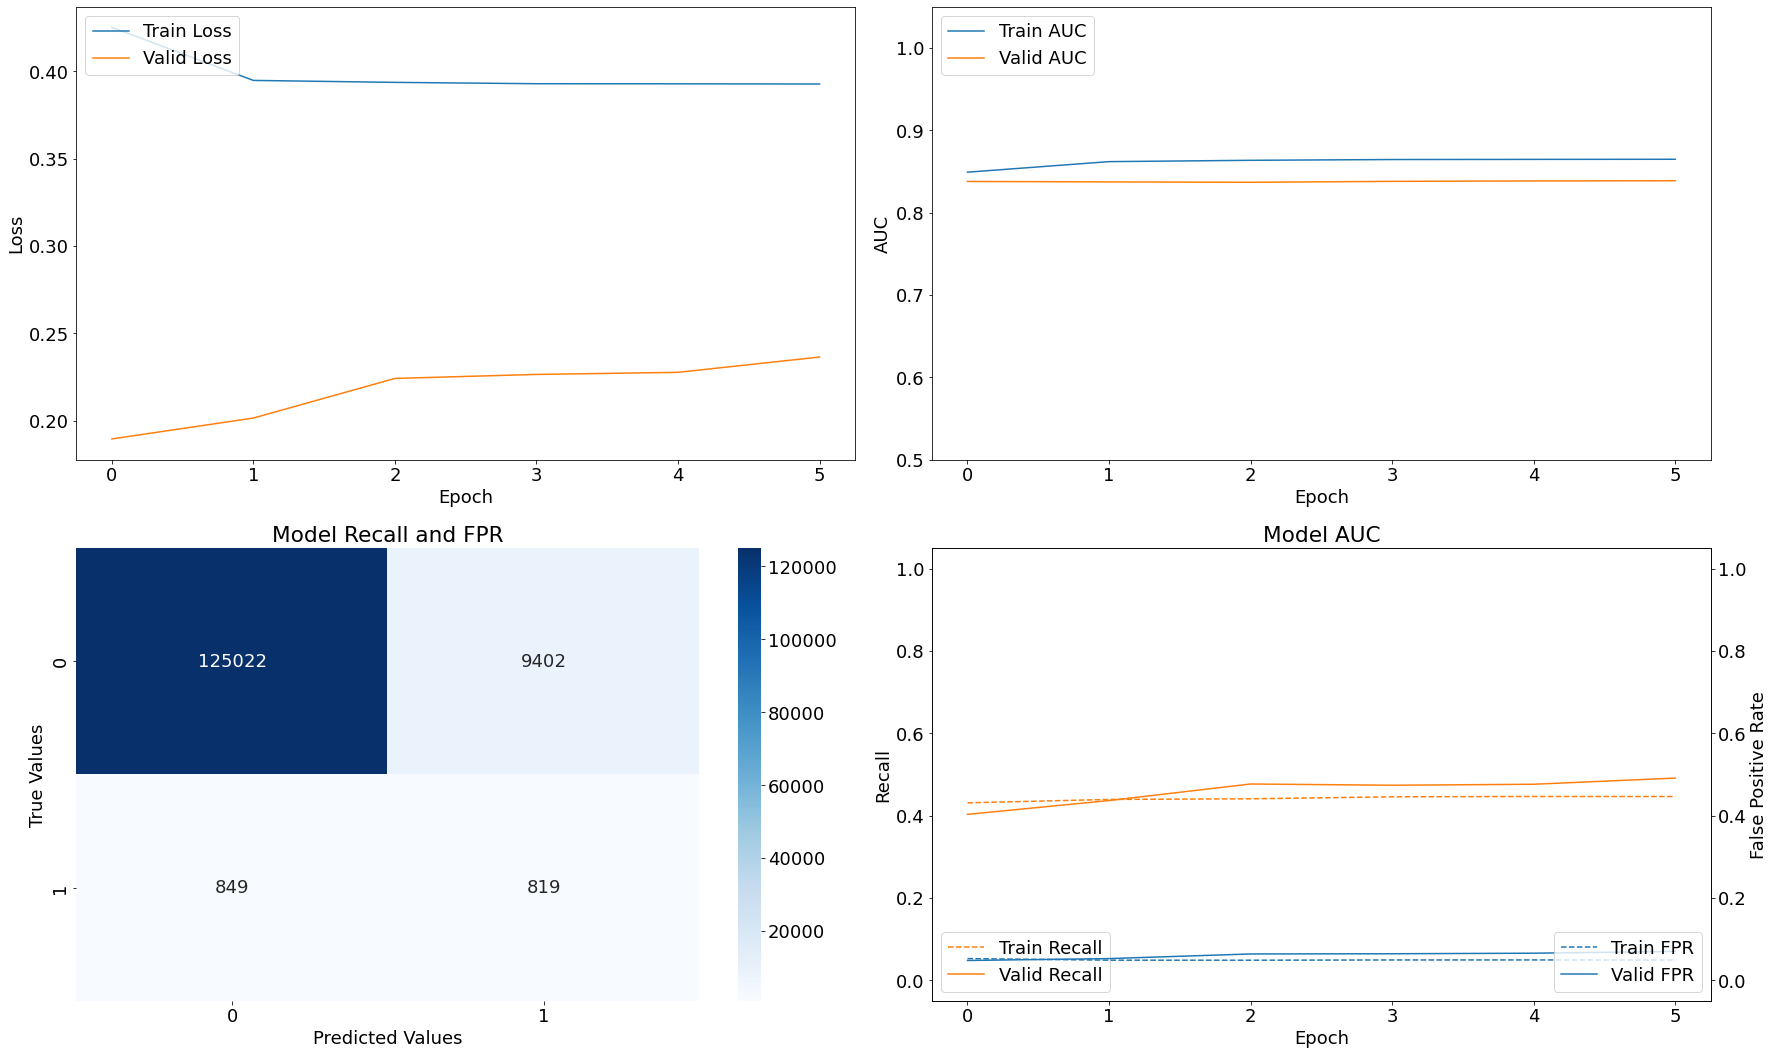

Epoch 00020: early stopping
Results for Variant III Model V7 with threshold = 0.4.

 Train f1: 0.5979416454366834 
 Val f1: 0.1257378596310797 

 Train Recall: 0.5732824206352234 
 Val Recall: 0.5299760103225708 

 Train FPR: 0.0860590711236 
 Val FPR: 0.08561715483665466


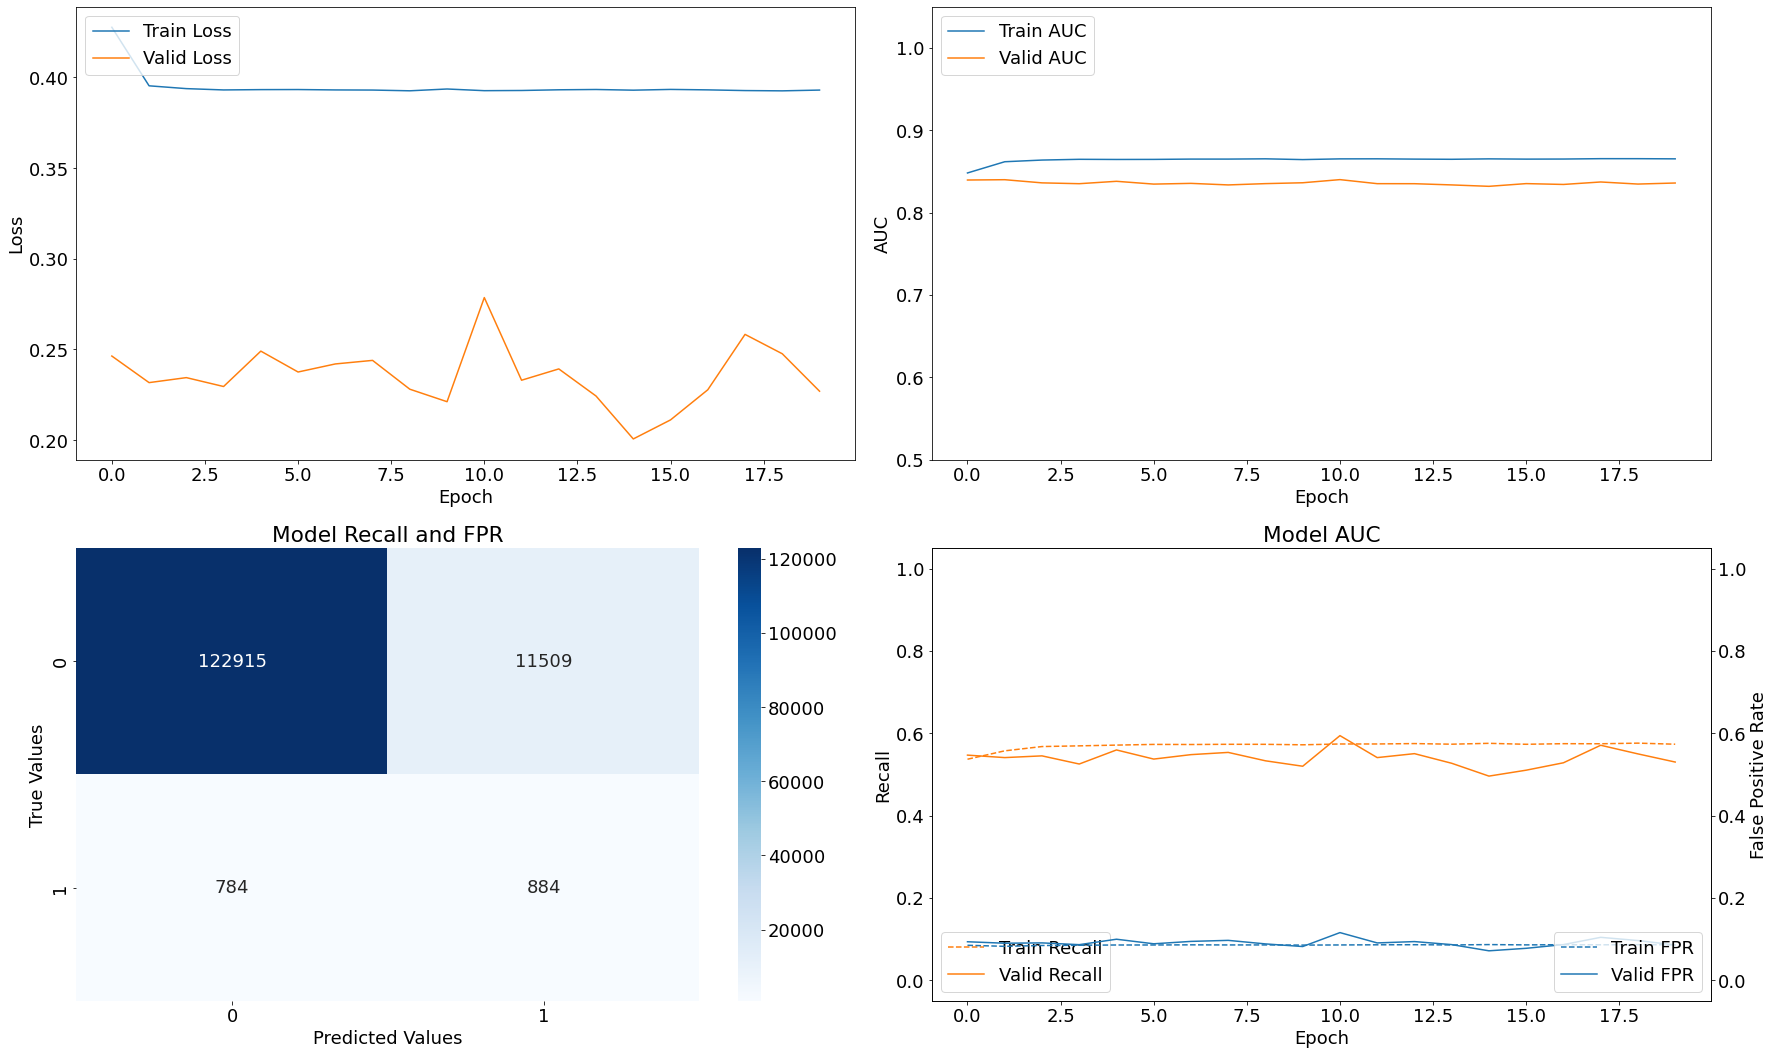

Epoch 00007: early stopping
Results for Variant III Model V7 with threshold = 0.3.

 Train f1: 0.6139610757885432 
 Val f1: 0.10861149949328541 

 Train Recall: 0.6743561029434204 
 Val Recall: 0.5803357362747192 

 Train FPR: 0.1305953711271286 
 Val FPR: 0.11299321800470352


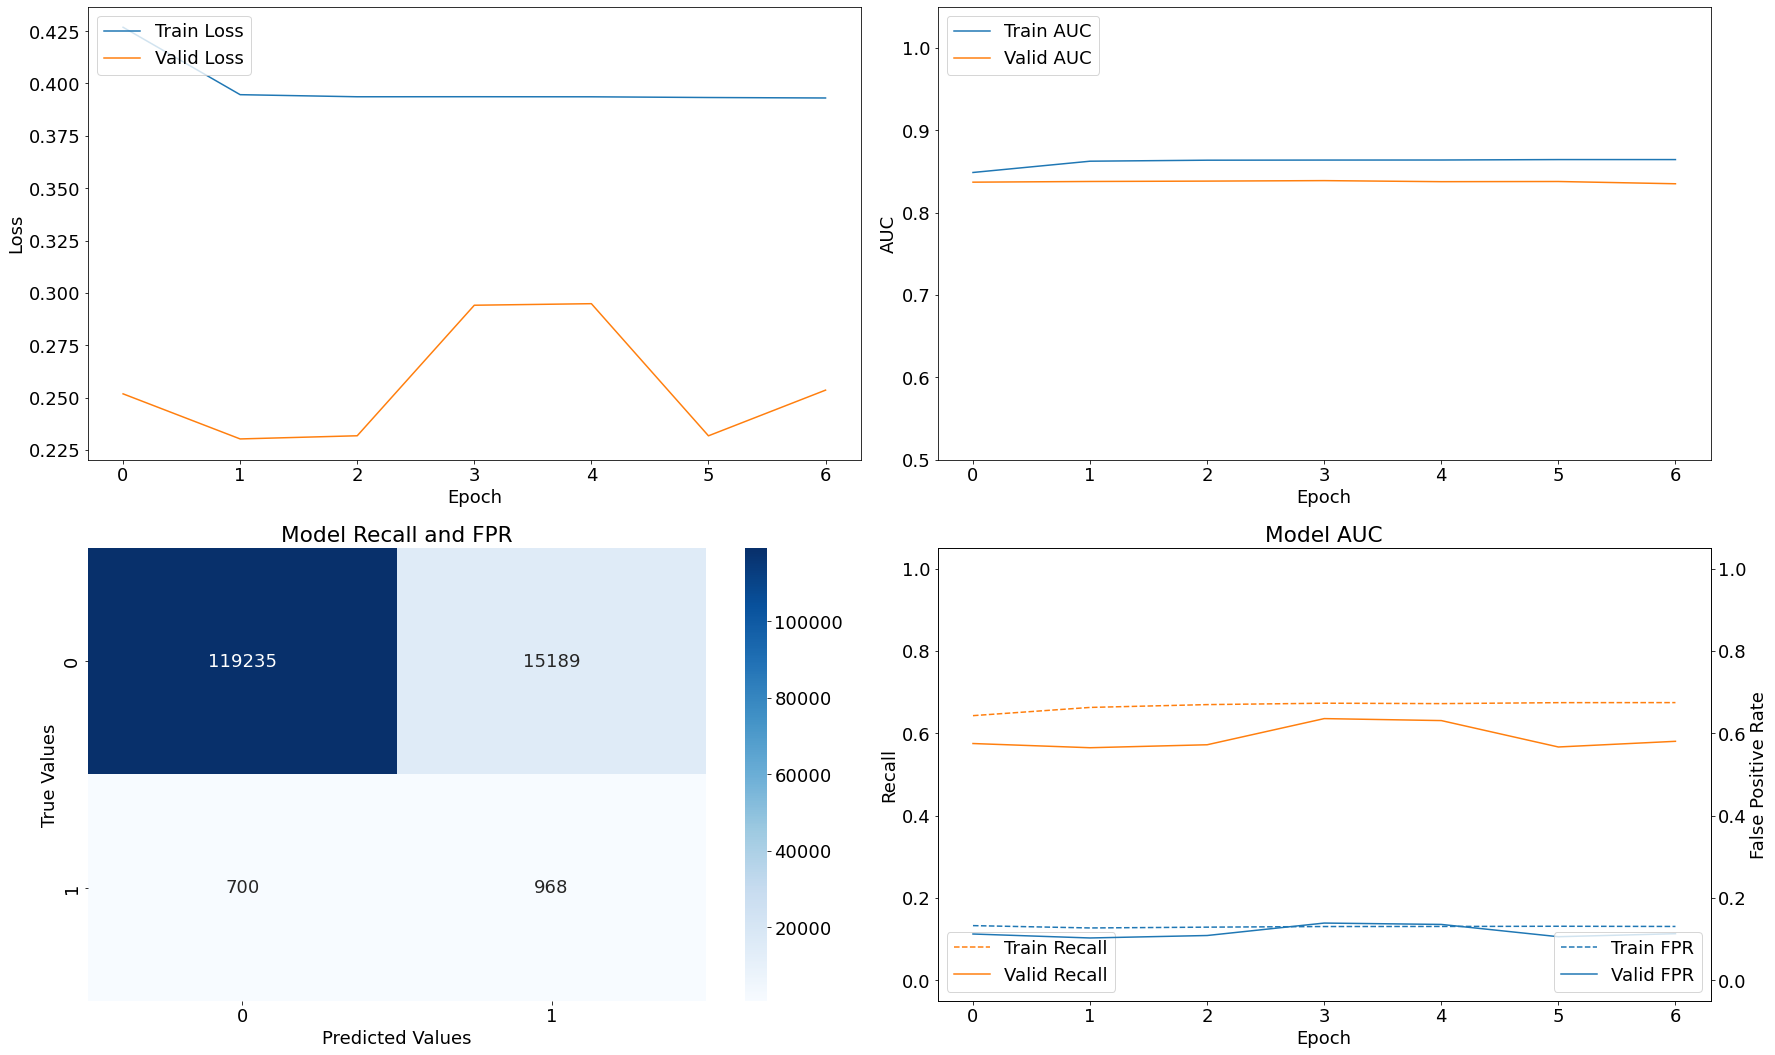

Epoch 00010: early stopping
Results for Variant III Model V7 with threshold = 0.2.

 Train f1: 0.5922208544931773 
 Val f1: 0.08824210311966965 

 Train Recall: 0.7937083840370178 
 Val Recall: 0.685251772403717 

 Train FPR: 0.22168411314487457 
 Val FPR: 0.17180712521076202


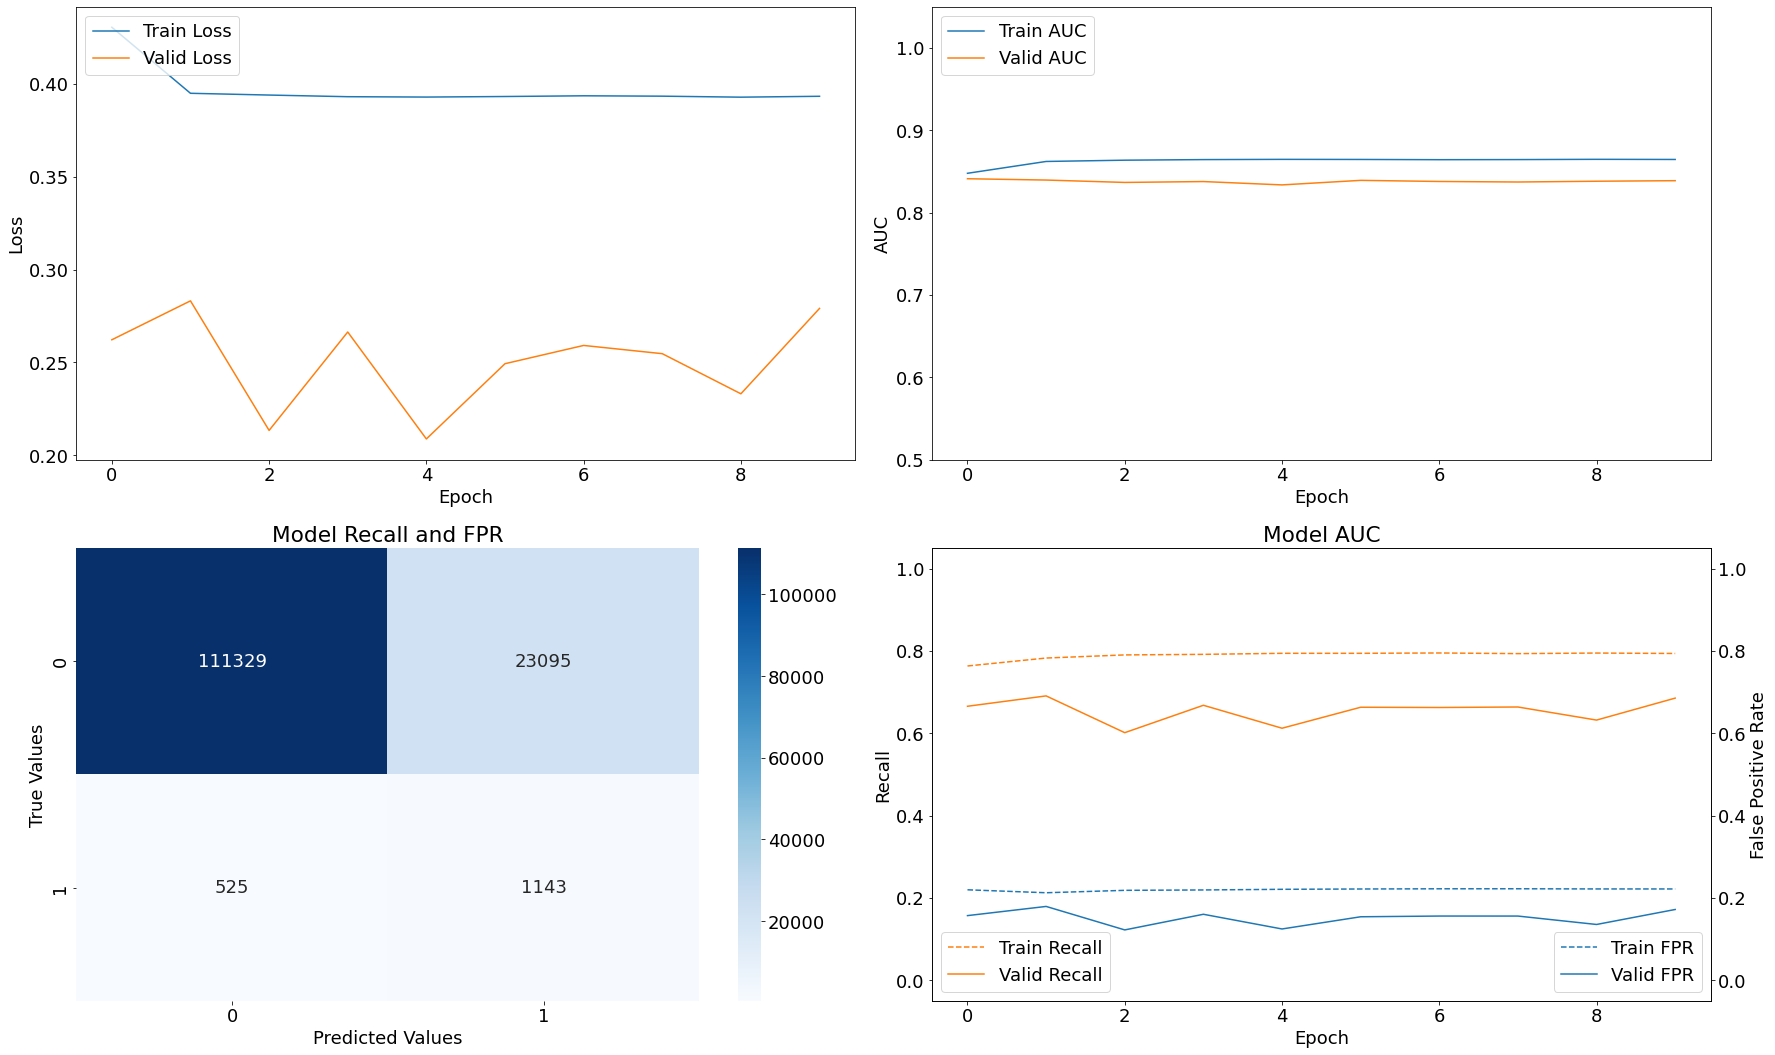

Epoch 00009: early stopping
Results for Variant III Model V7 with threshold = 0.1.

 Train f1: 0.5155888113467807 
 Val f1: 0.08578259830672572 

 Train Recall: 0.9103991389274597 
 Val Recall: 0.6990407705307007 

 Train FPR: 0.40527236461639404 
 Val FPR: 0.18115068972110748


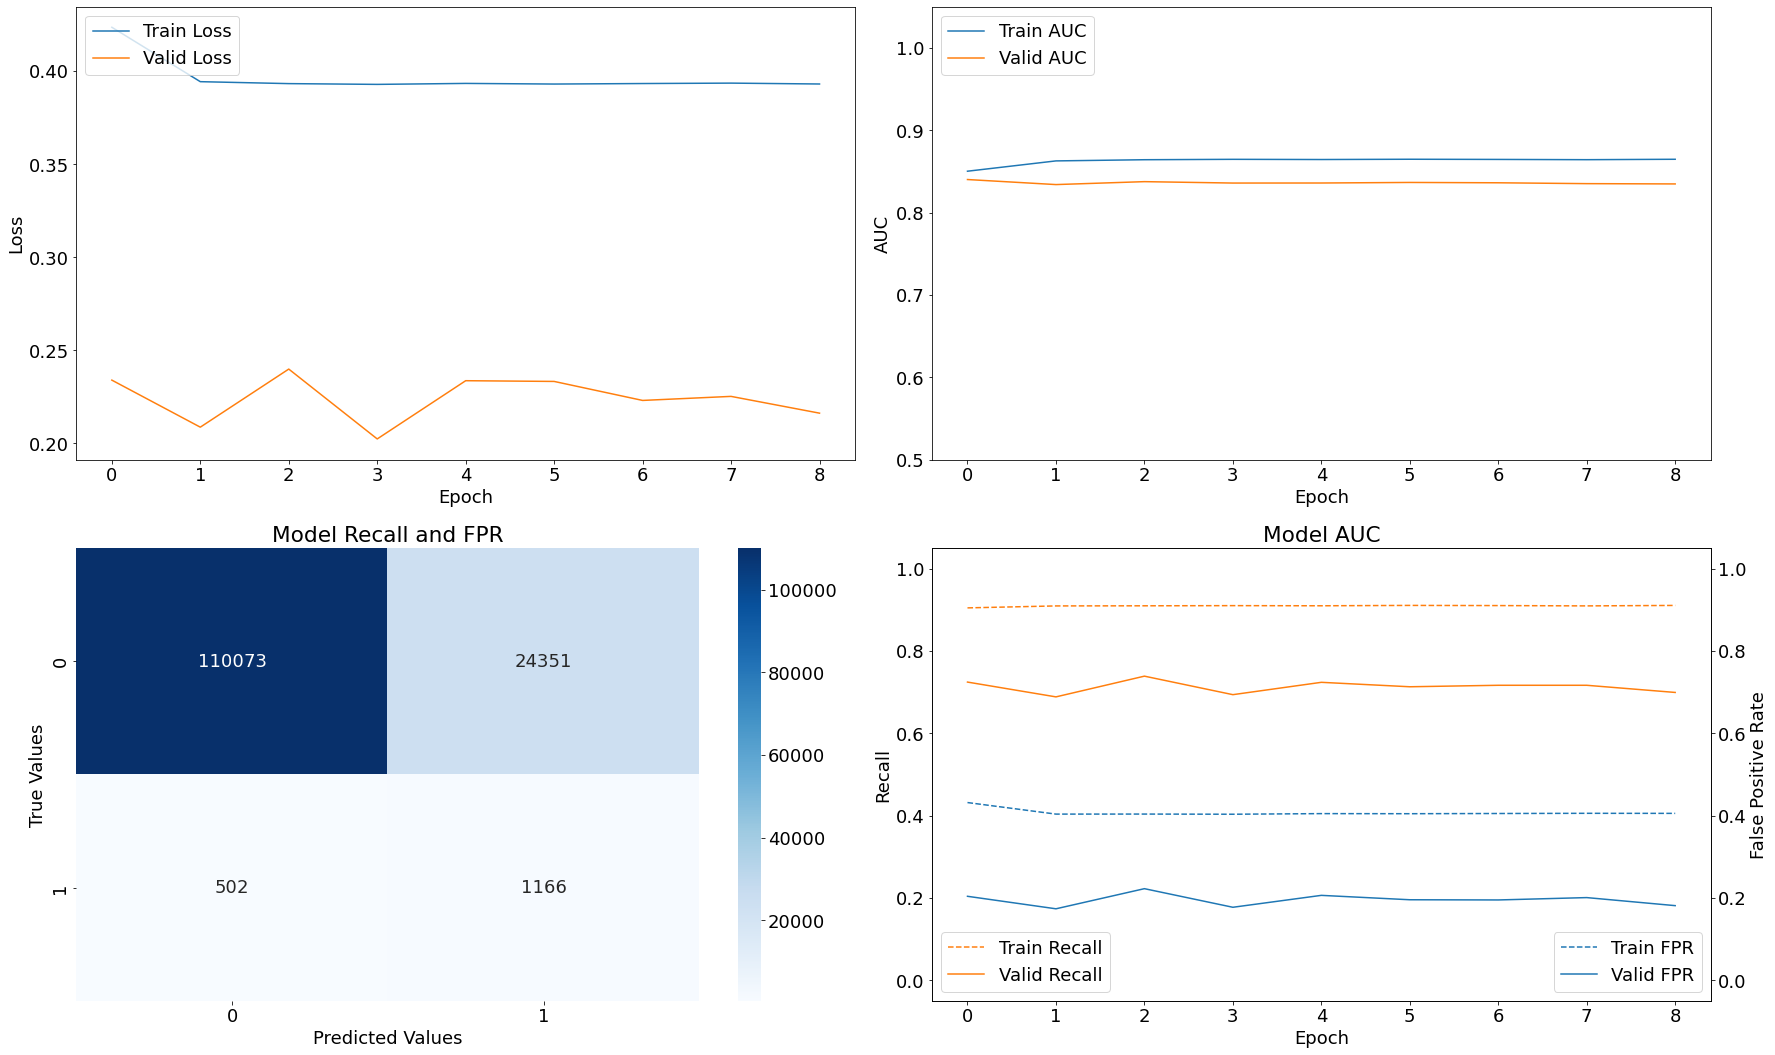

In [21]:
for t in thresholds:
    
    modelling_v7(X_train_v4_scaled_resampled,
                 y_train_v4_resampled,
                 X_val_v4_scaled,
                 y_val_v4,
                 'Variant IV Model V7',
                 threshold=t)

---

### Eighth Model Iteration

In [22]:
def modelling_v8(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):   
    
    model_v8 = models.Sequential()

    model_v8.add(layers.Input(shape=(n_features, )))
    model_v8.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(8,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(4,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.Dense(1, activation='sigmoid'))

    model_v8.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v8_history = model_v8.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    verbose=0).history
    
    evaluate(model_v8,
             name,
             model_v8_history,
             X_val,
             y_val,
             threshold=threshold)

Results for Variant III Model V8 with threshold = 0.5.

 Train f1: 0.536443014767852 
 Val f1: 0.16793462914836485 

 Train Recall: 0.44465482234954834 
 Val Recall: 0.3573141396045685 

 Train FPR: 0.05328355357050896 
 Val FPR: 0.0359608419239521


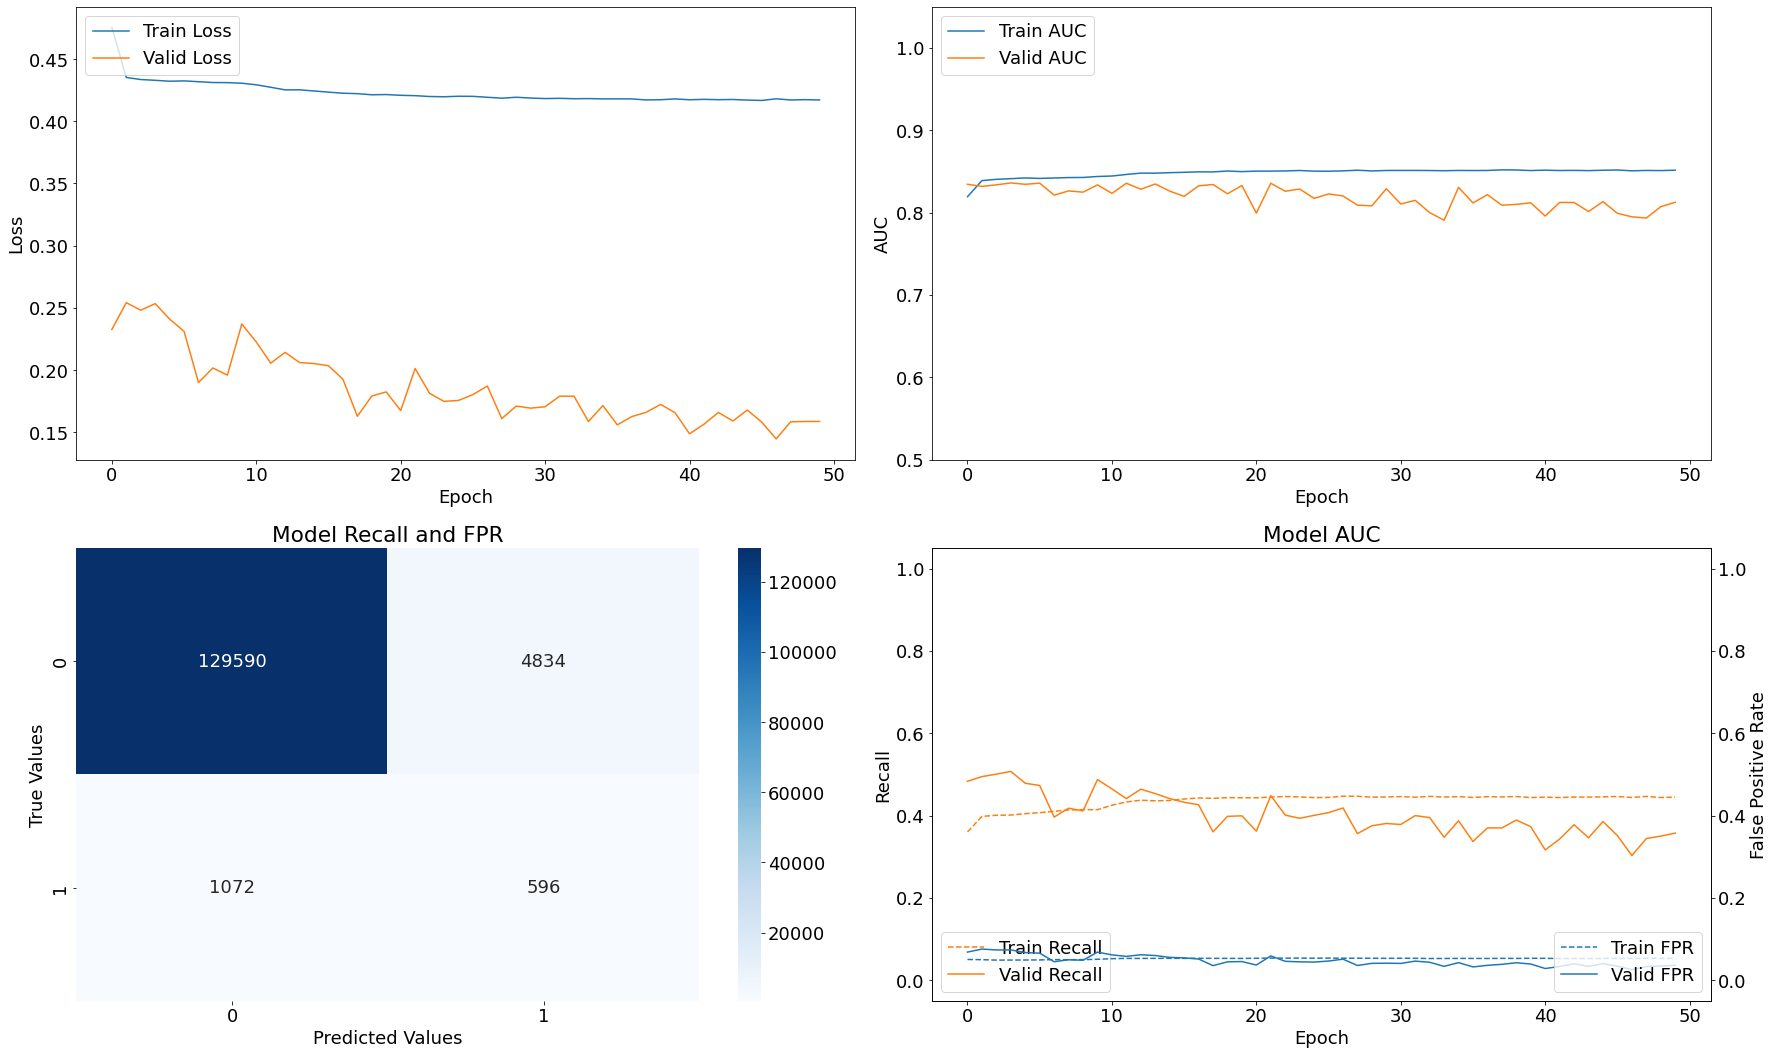

Results for Variant III Model V8 with threshold = 0.4.

 Train f1: 0.5681421720409789 
 Val f1: 0.10228190498645422 

 Train Recall: 0.5392800569534302 
 Val Recall: 0.6073141694068909 

 Train FPR: 0.0897793173789978 
 Val FPR: 0.12741027772426605


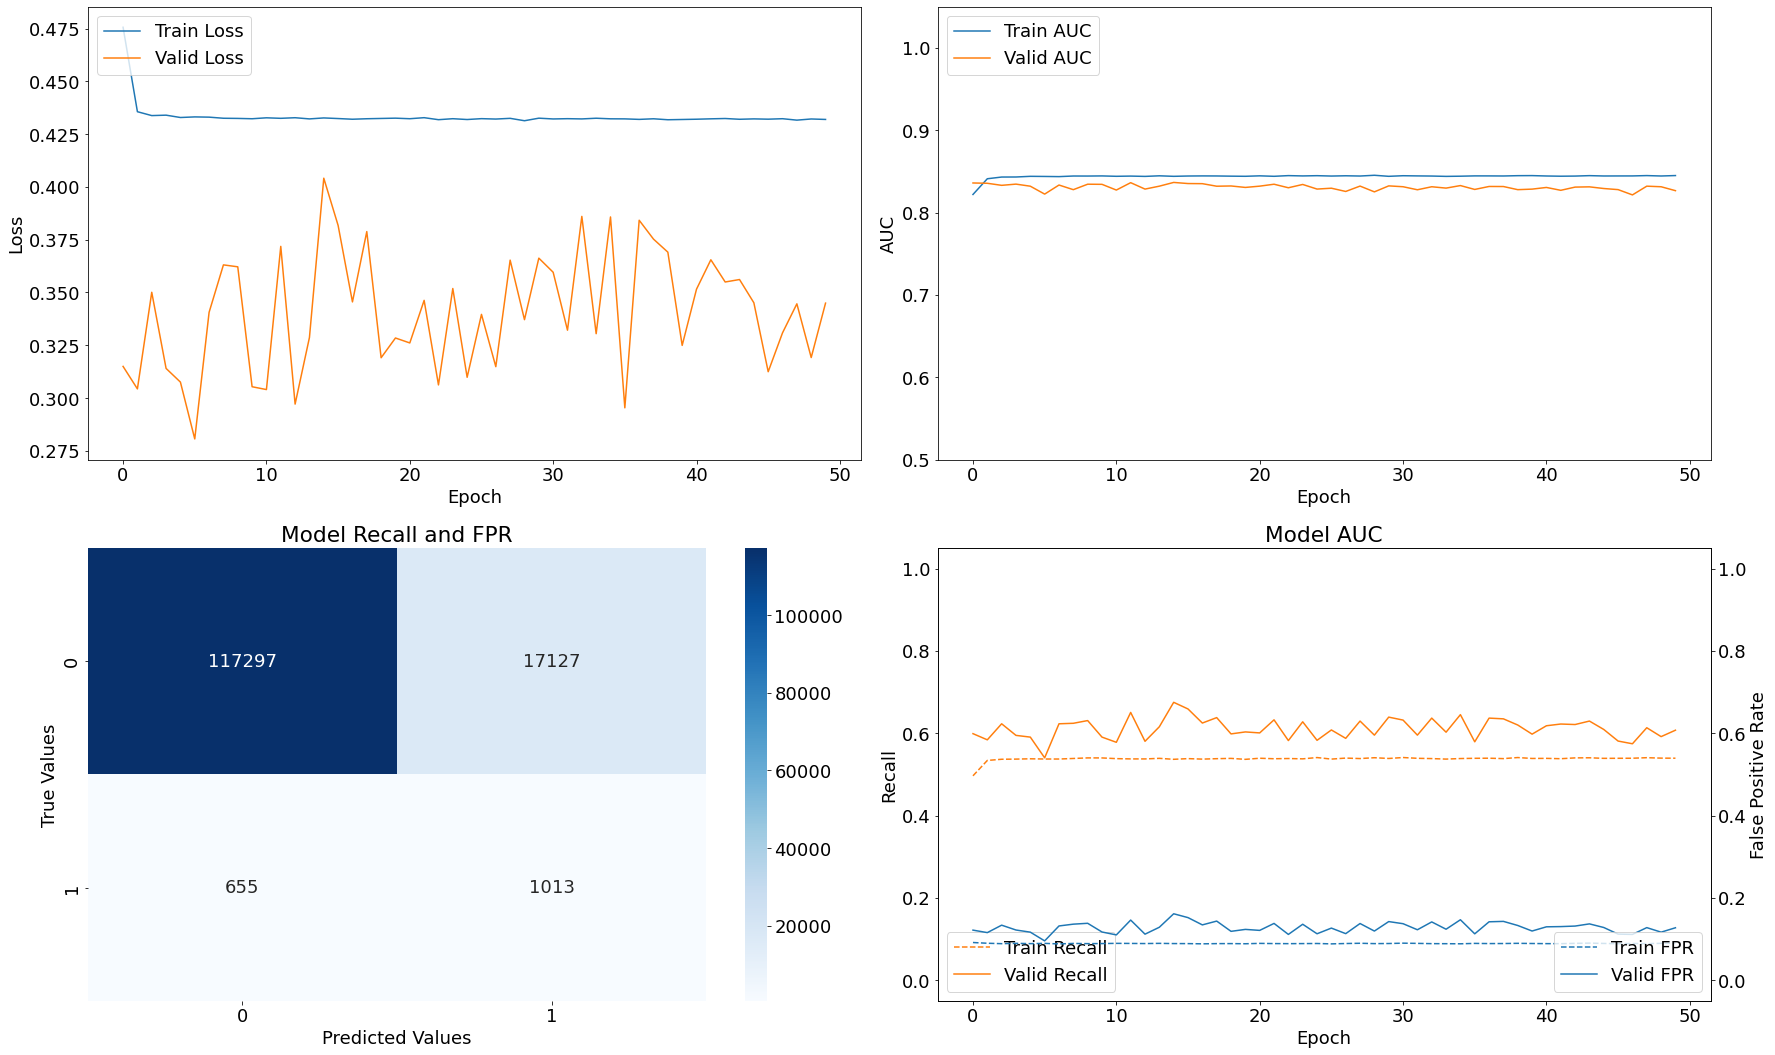

Results for Variant III Model V8 with threshold = 0.3.

 Train f1: 0.5925130622138878 
 Val f1: 0.10126335388193779 

 Train Recall: 0.6593737006187439 
 Val Recall: 0.6223021745681763 

 Train FPR: 0.14157743752002716 
 Val FPR: 0.13237963616847992


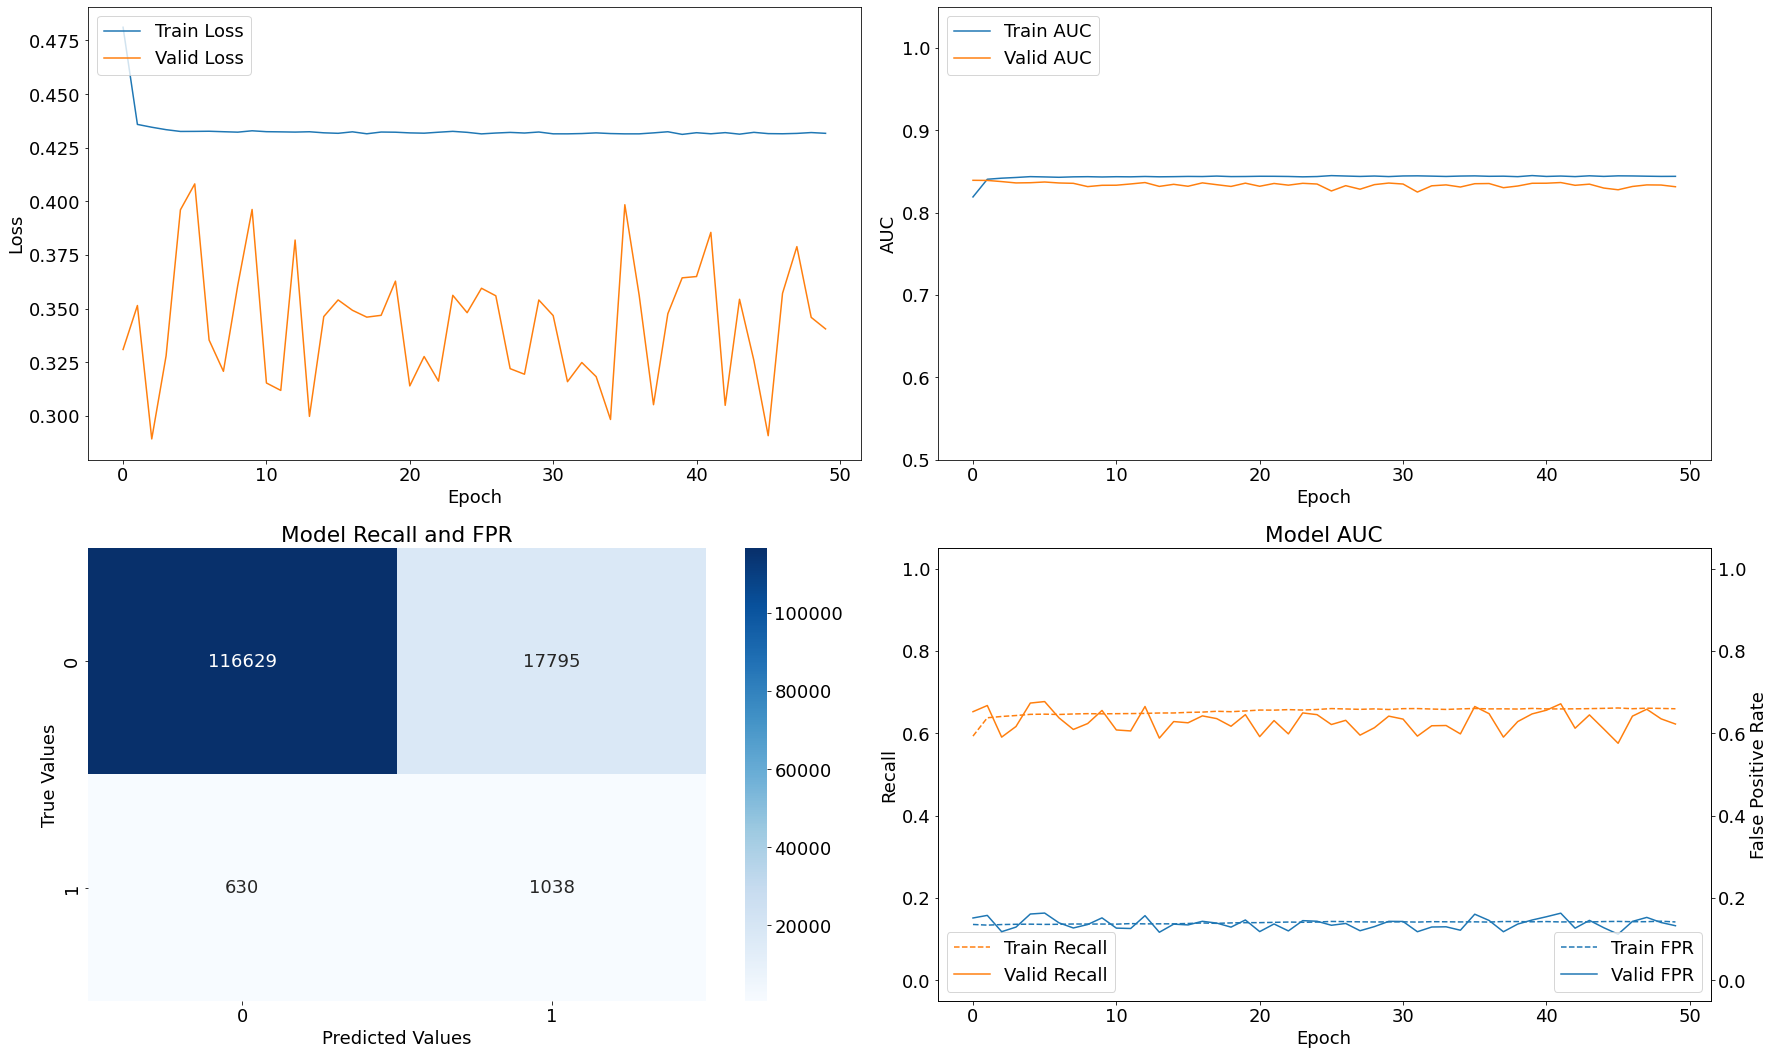

Results for Variant III Model V8 with threshold = 0.2.

 Train f1: 0.5689987341769853 
 Val f1: 0.10802486362414067 

 Train Recall: 0.7701013684272766 
 Val Recall: 0.5887290239334106 

 Train FPR: 0.23419028520584106 
 Val FPR: 0.11553740501403809


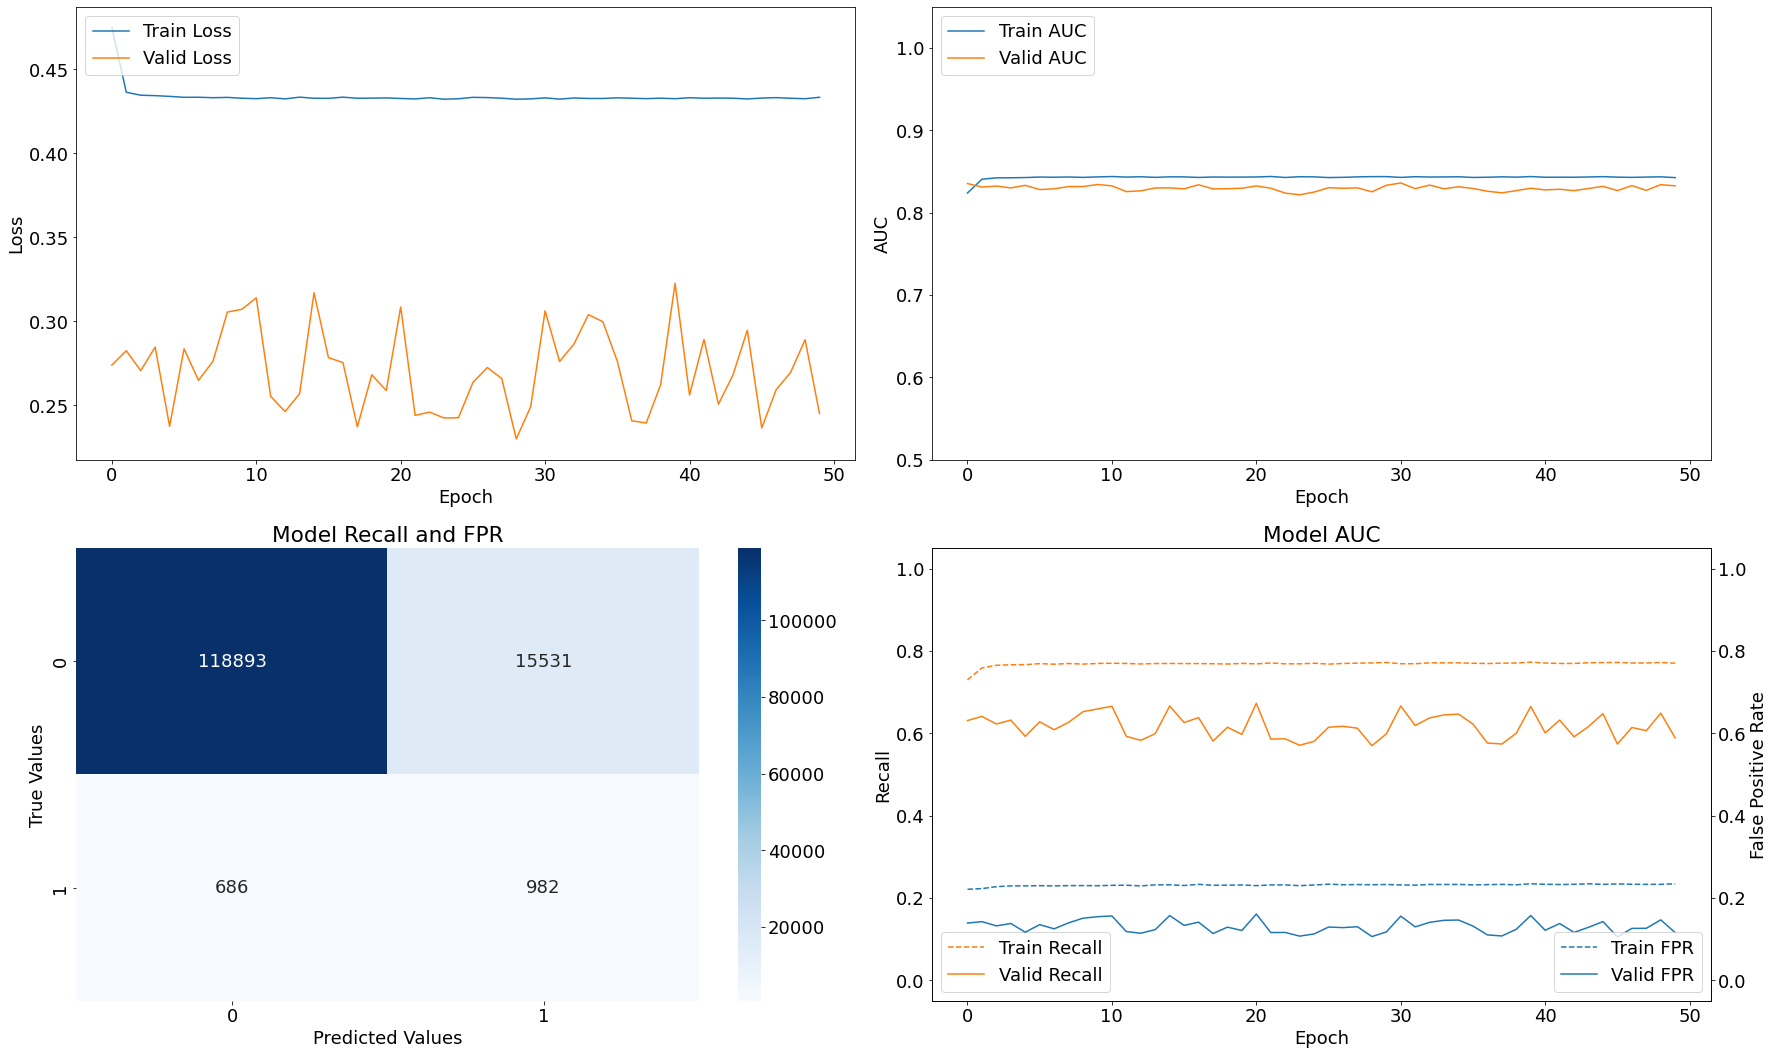

Results for Variant III Model V8 with threshold = 0.1.

 Train f1: 0.49442960508335804 
 Val f1: 0.07483510453365863 

 Train Recall: 0.8980782628059387 
 Val Recall: 0.7380095720291138 

 Train FPR: 0.4336755871772766 
 Val FPR: 0.22317443788051605


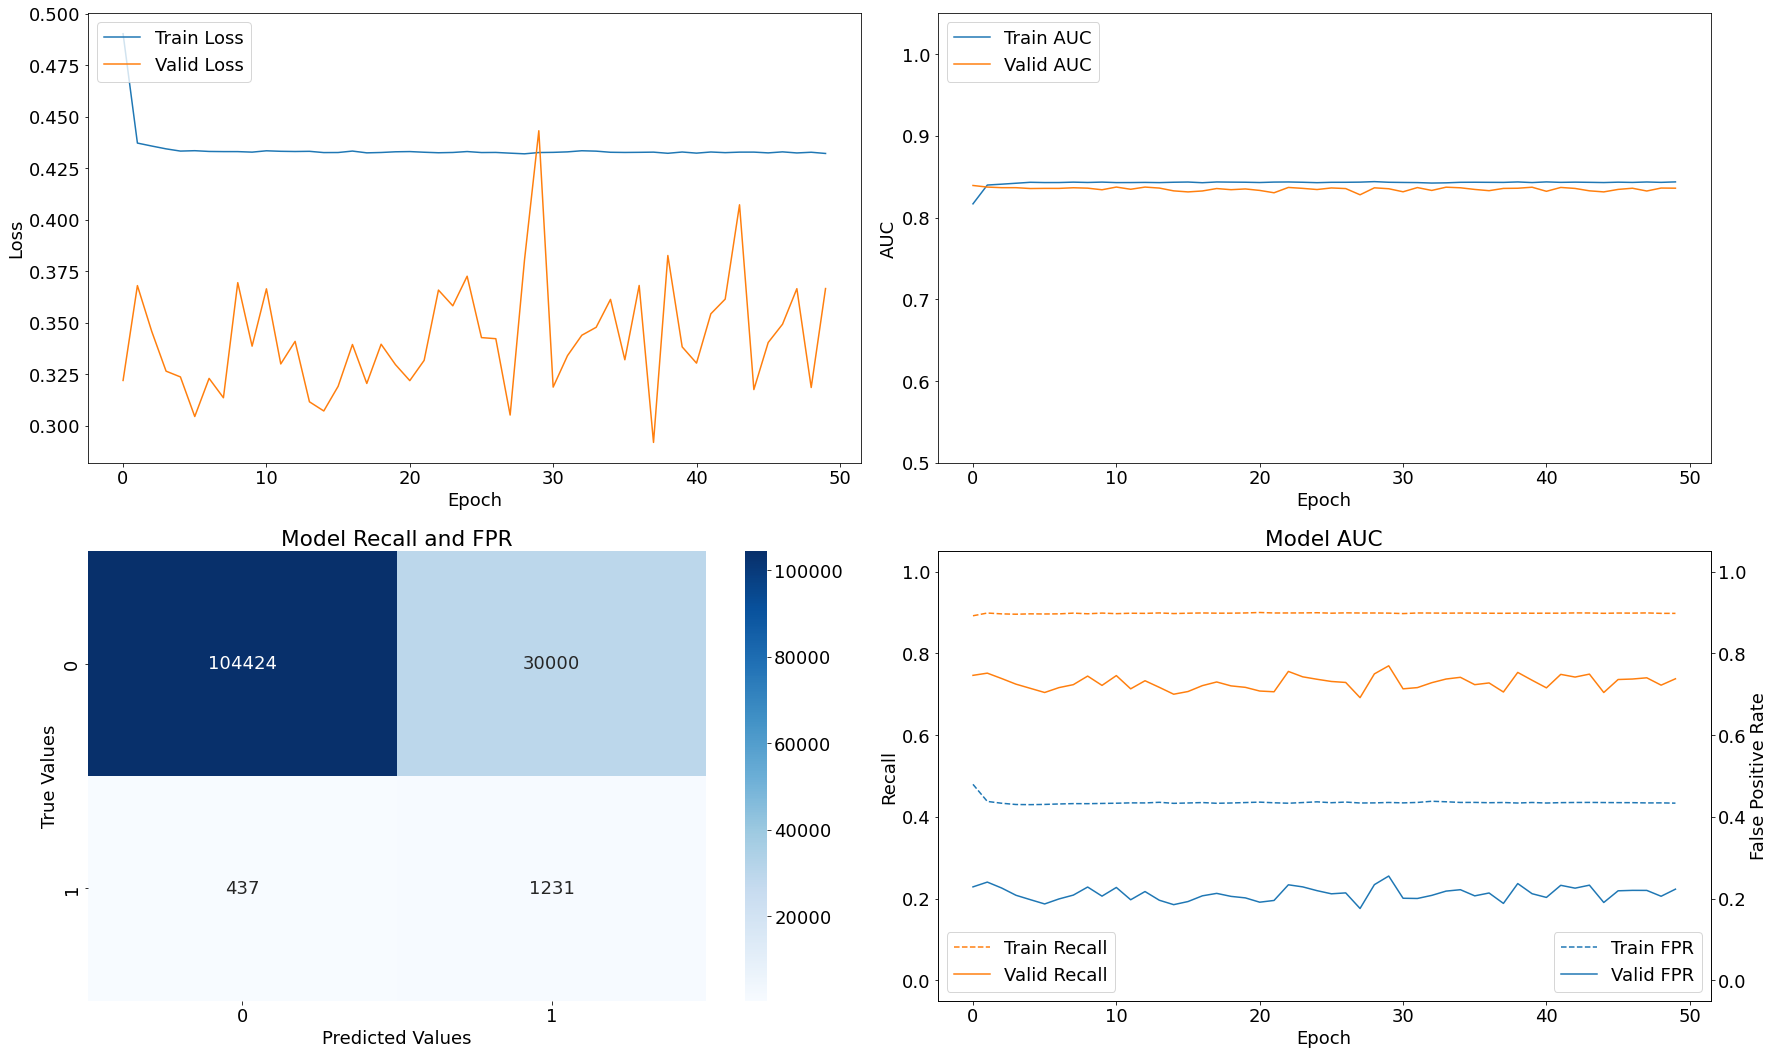

In [23]:
for t in thresholds:
    
    modelling_v8(X_train_v4_scaled_resampled,
                 y_train_v4_resampled,
                 X_val_v4_scaled,
                 y_val_v4,
                 'Variant IV Model V8',
                 threshold=t)

---

### Ninth Model Iteration

In [24]:
def modelling_v9(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):

    model_v9 = models.Sequential()

    model_v9.add(layers.Input(shape=(n_features, )))
    model_v9.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(8,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(4,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.Dense(1, activation='sigmoid'))

    model_v9.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v9_history = model_v9.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v9,
             name,
             model_v9_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00009: early stopping
Results for Variant III Model V9 with threshold = 0.5.

 Train f1: 0.5704684850480877 
 Val f1: 0.11724095195119717 

 Train Recall: 0.49439162015914917 
 Val Recall: 0.5599520206451416 

 Train FPR: 0.059722647070884705 
 Val FPR: 0.09917128086090088


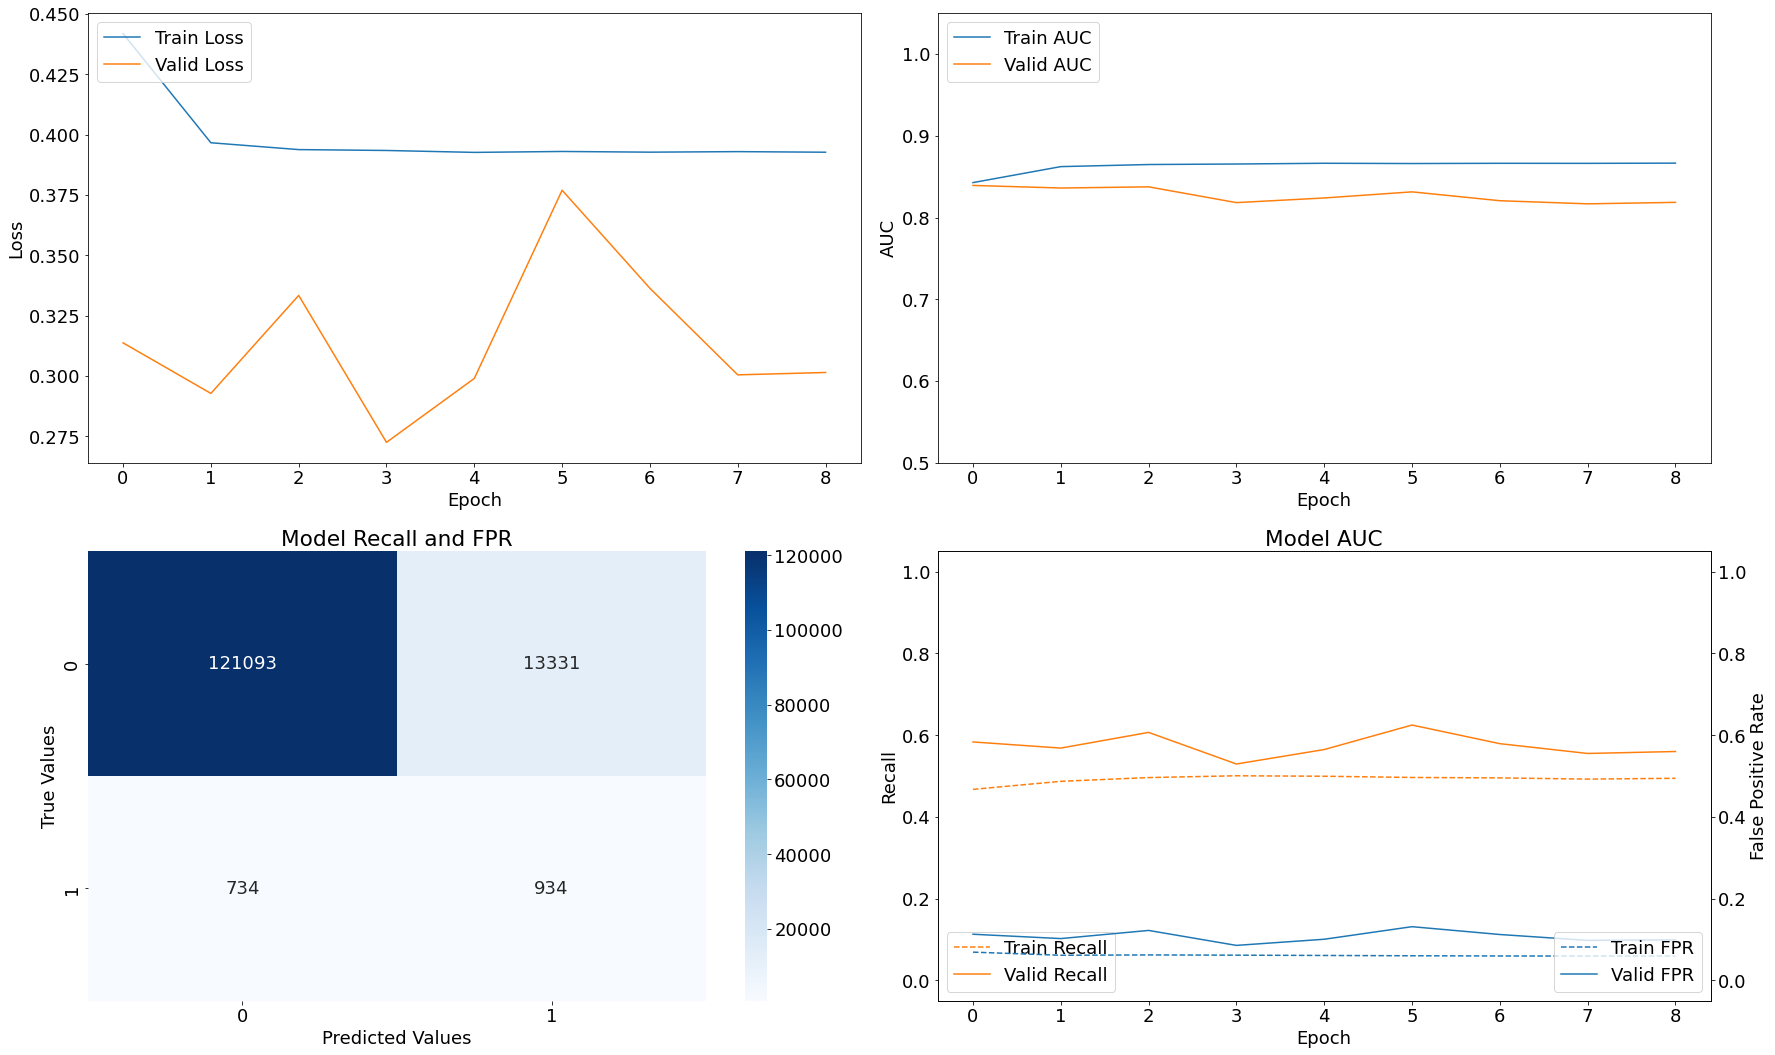

Epoch 00017: early stopping
Results for Variant III Model V9 with threshold = 0.4.

 Train f1: 0.6148407549177515 
 Val f1: 0.13437023627599032 

 Train Recall: 0.5987882018089294 
 Val Recall: 0.5023980736732483 

 Train FPR: 0.08724848181009293 
 Val FPR: 0.07414598762989044


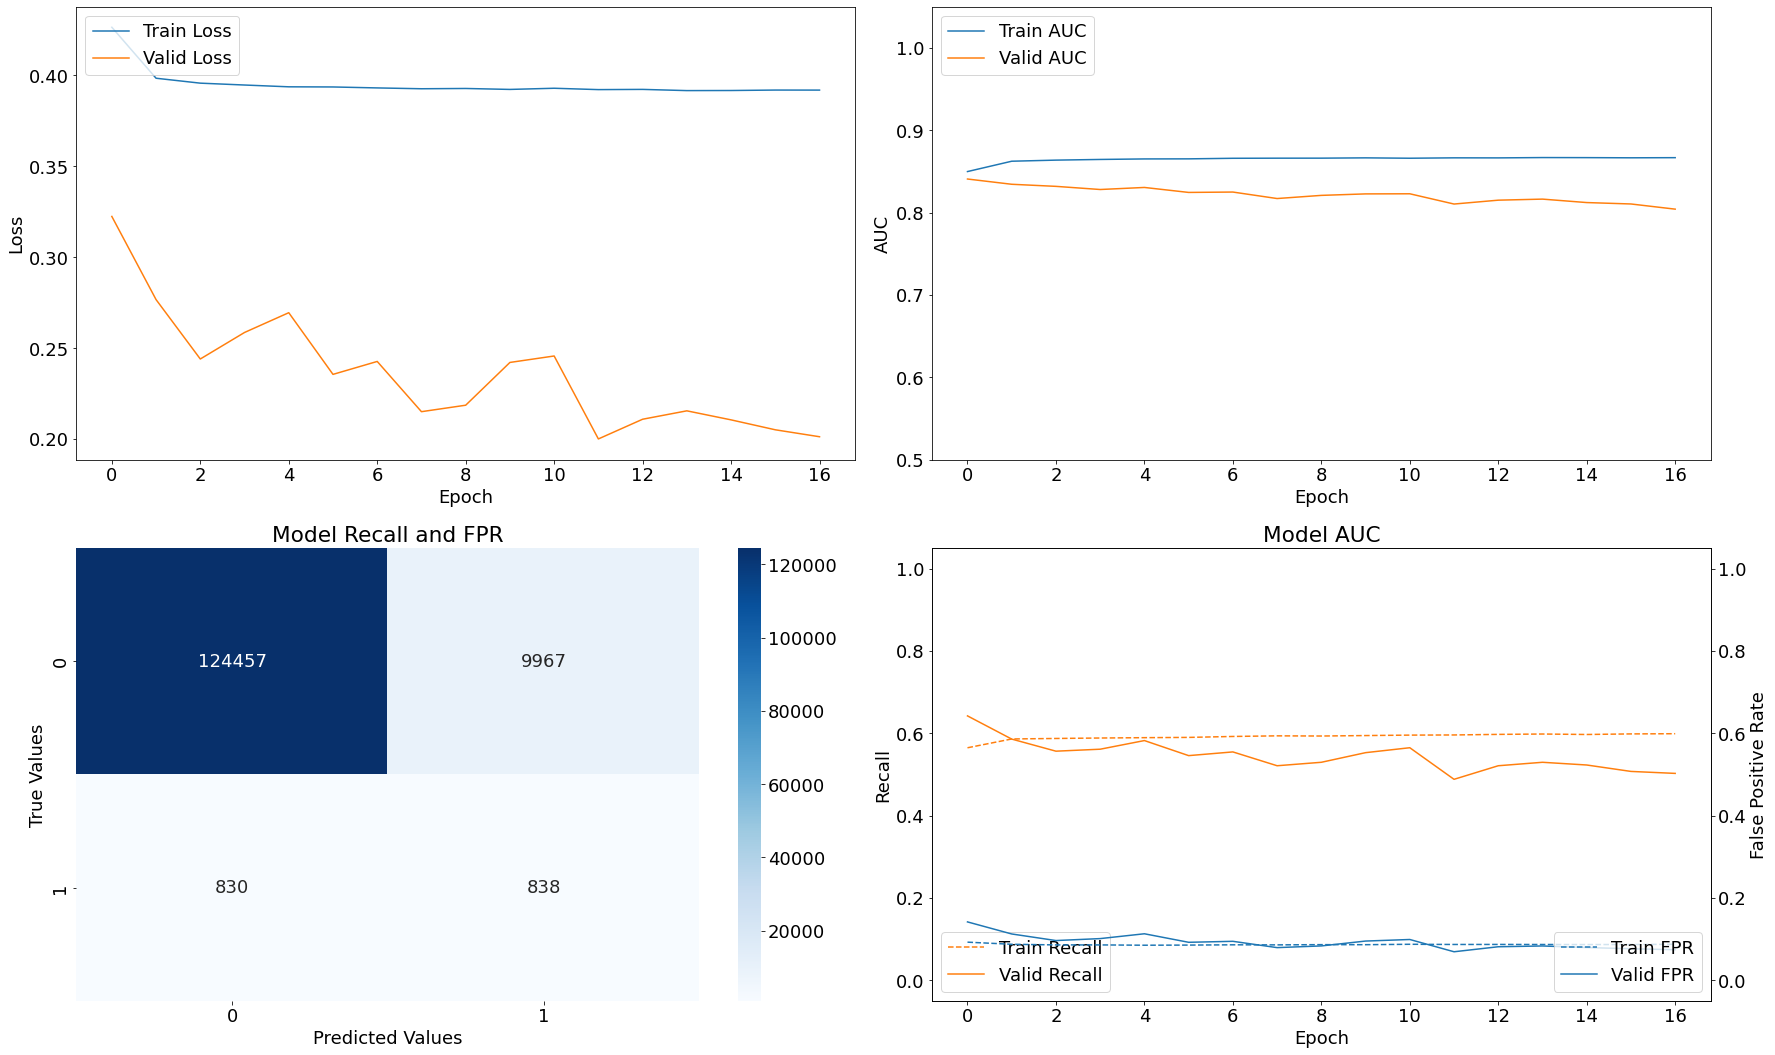

Epoch 00006: early stopping
Results for Variant III Model V9 with threshold = 0.3.

 Train f1: 0.6225487950220516 
 Val f1: 0.09576507434089031 

 Train Recall: 0.6925547122955322 
 Val Recall: 0.6588729023933411 

 Train FPR: 0.1330862045288086 
 Val FPR: 0.15015919506549835


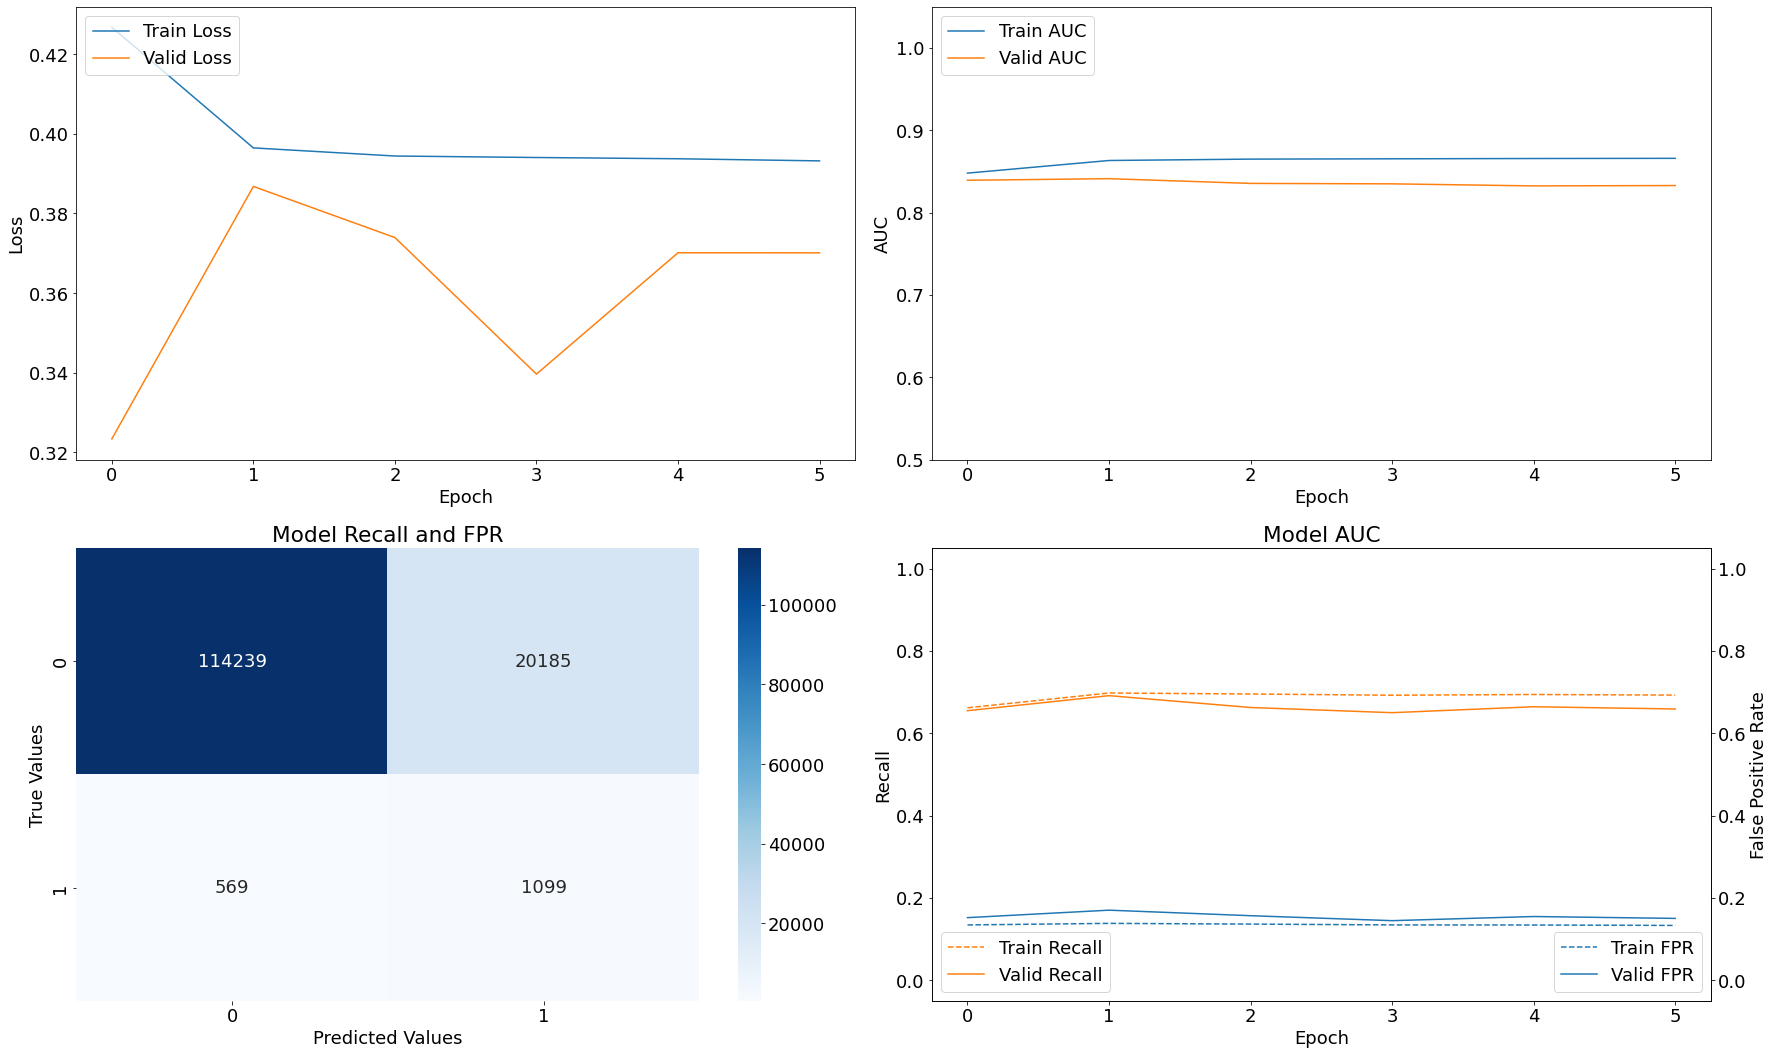

Epoch 00009: early stopping
Results for Variant III Model V9 with threshold = 0.2.

 Train f1: 0.6110988729513737 
 Val f1: 0.09733592366514406 

 Train Recall: 0.7986100316047668 
 Val Recall: 0.6450839042663574 

 Train FPR: 0.20376825332641602 
 Val FPR: 0.14405909180641174


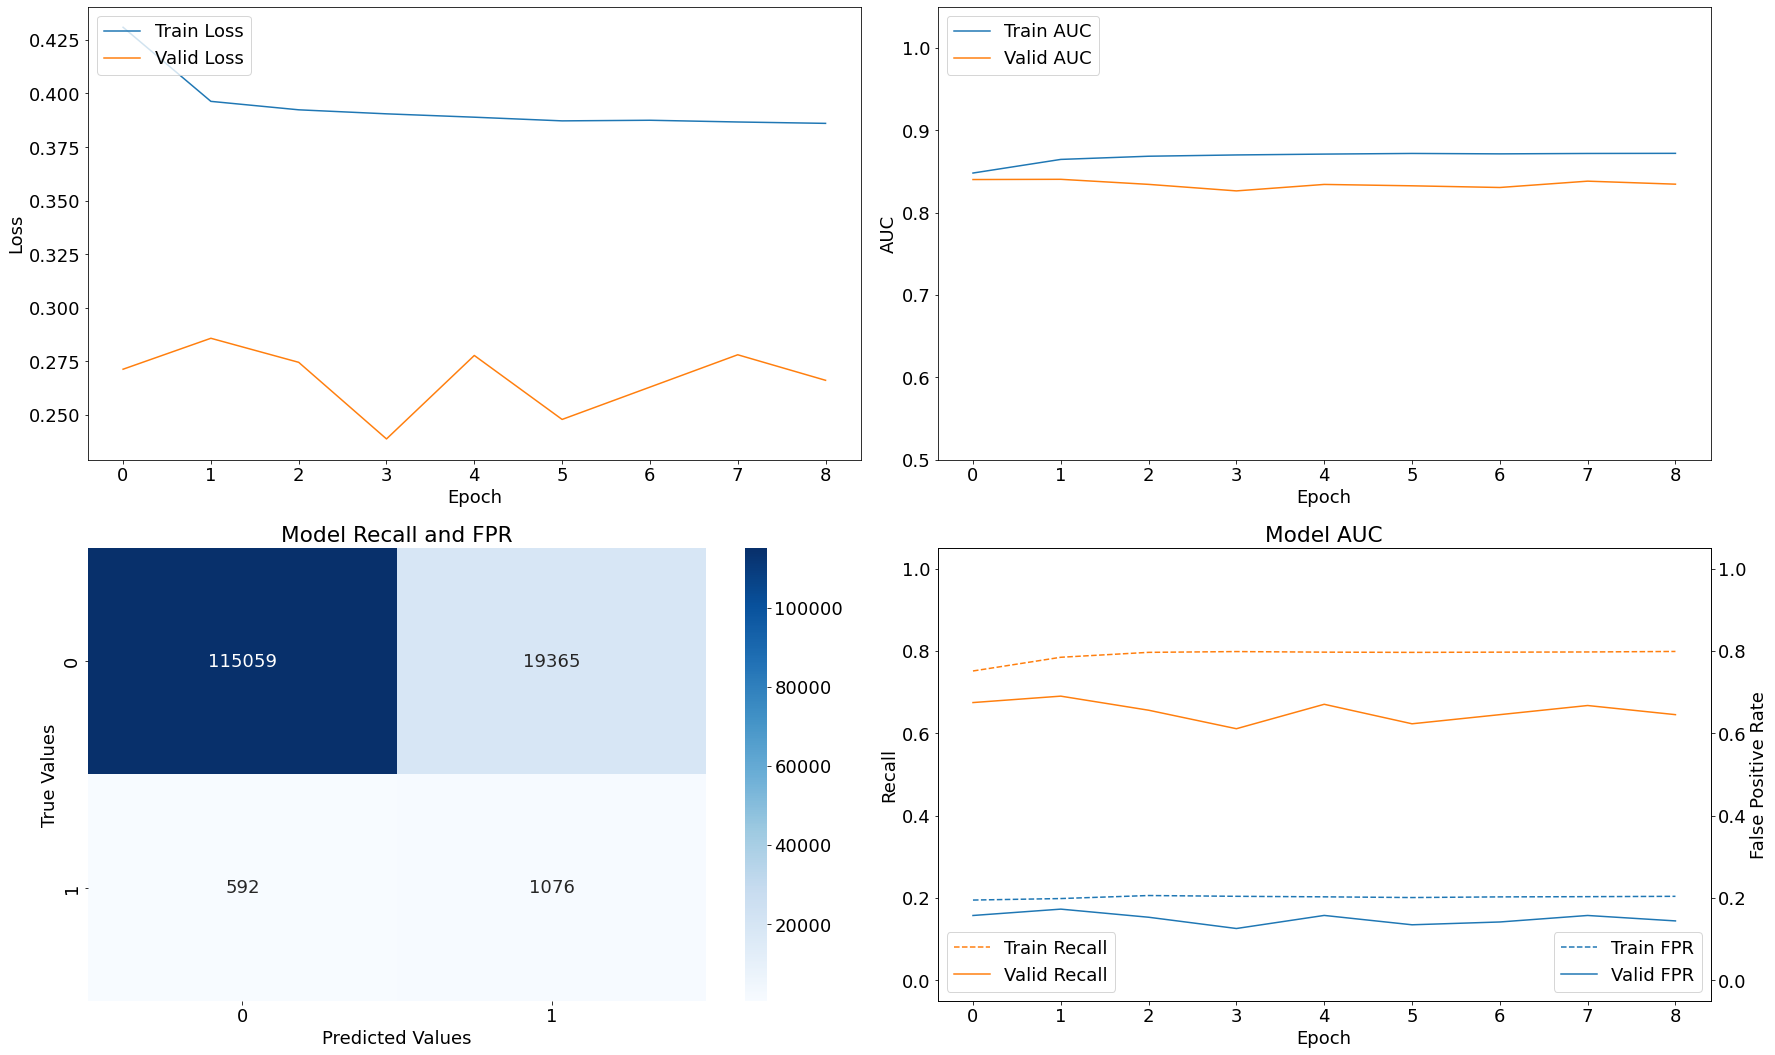

Epoch 00006: early stopping
Results for Variant III Model V9 with threshold = 0.1.

 Train f1: 0.5312988132620315 
 Val f1: 0.06446815944624631 

 Train Recall: 0.9036786556243896 
 Val Recall: 0.8057553768157959 

 Train FPR: 0.37452229857444763 
 Val FPR: 0.28776854276657104


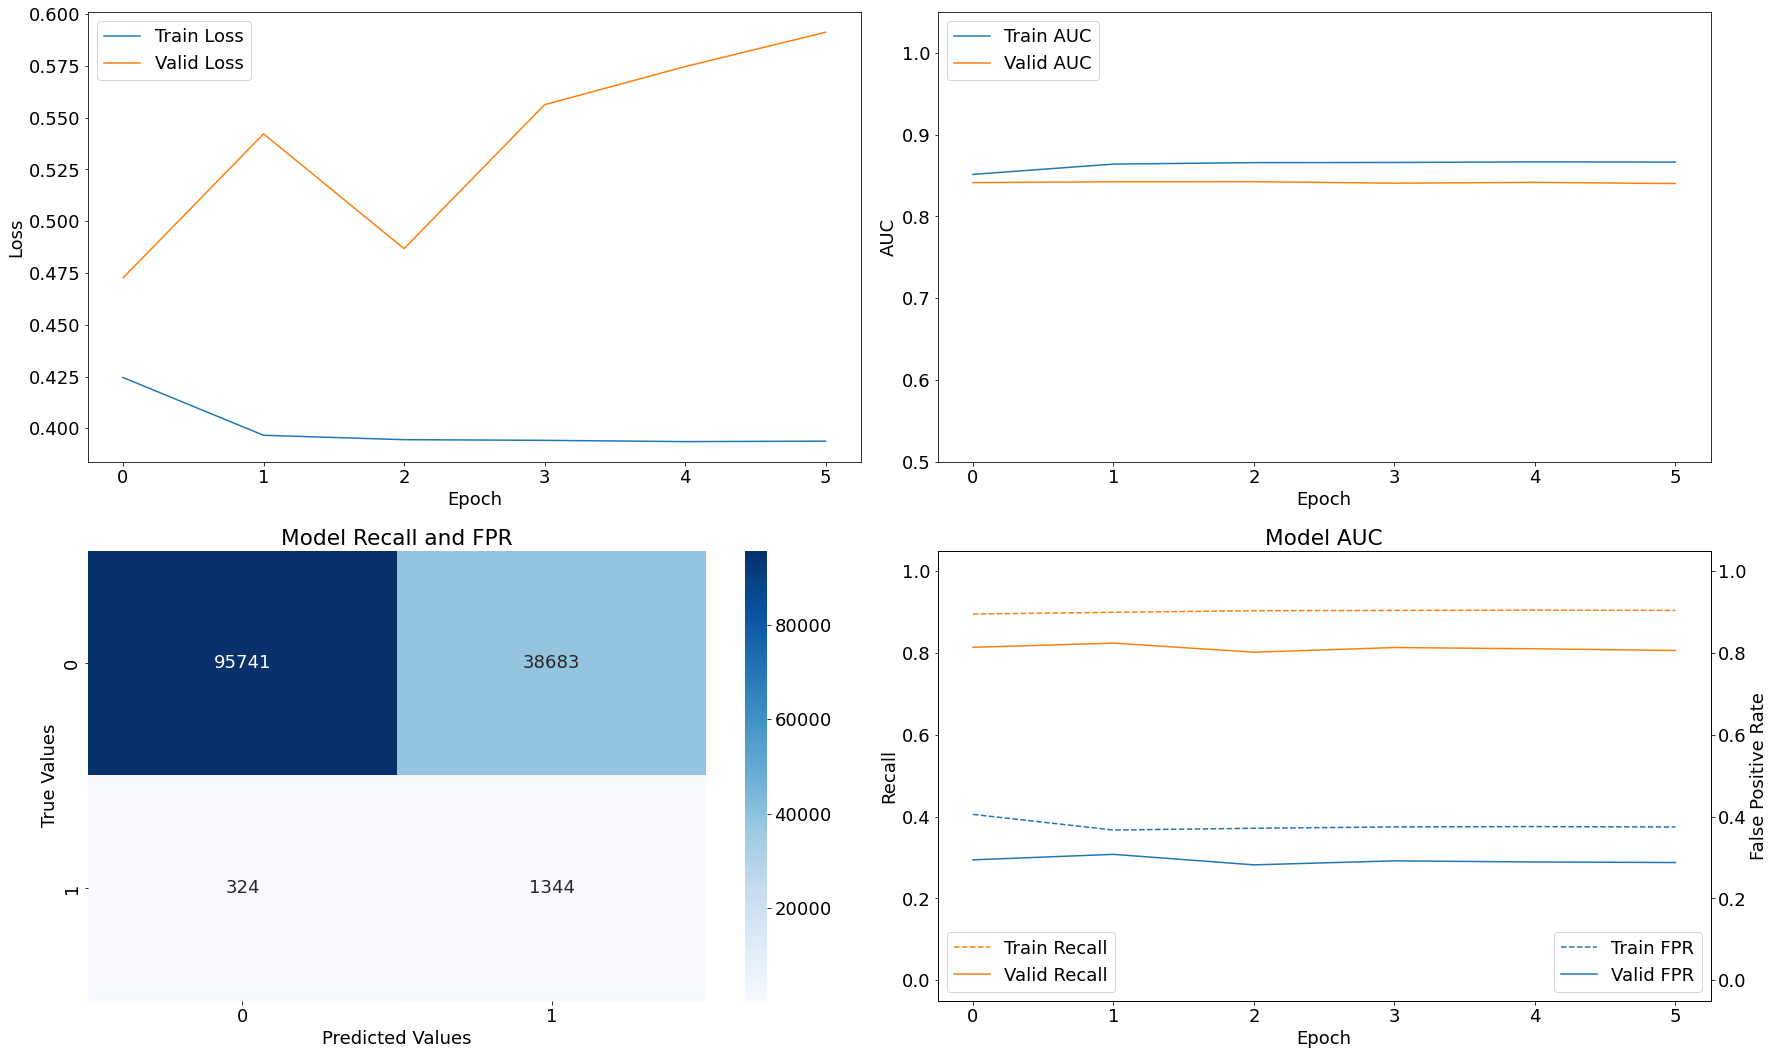

In [25]:
for t in thresholds:
    
    modelling_v9(X_train_v4_scaled_resampled,
                 y_train_v4_resampled,
                 X_val_v4_scaled,
                 y_val_v4,
                 'Variant IV Model V9',
                 threshold=t)

---